# EDA on Sentiment Data


Analyse statement by Loughran and McDonald dictionary

In [1]:
%config InlineBackend.figure_format='retina'
import logging
from ekorpkit import eKonf

logging.basicConfig(level=logging.WARNING)
print("version:", eKonf.__version__)
print("is notebook?", eKonf.is_notebook())
print("is colab?", eKonf.is_colab())
print("evironment varialbles:")
eKonf.print(eKonf.env().dict())

version: 0.1.33+28.g90d1dea
is notebook? True
is colab? False
evironment varialbles:
{'EKORPKIT_CONFIG_DIR': '/workspace/projects/ekorpkit-book/config',
 'EKORPKIT_DATA_DIR': None,
 'EKORPKIT_PROJECT': 'ekorpkit-book',
 'EKORPKIT_WORKSPACE_ROOT': '/workspace',
 'NUM_WORKERS': 230}


In [2]:
start_year = 2000
data_dir = "../data/fomc"
eKonf.env().FRED_API_KEY

pydantic.types.SecretStr

## Load datasets

In [3]:
tone_data_lm = eKonf.load_data('fomc_tone_data_lm.parquet', data_dir)
tone_data_lm

polarity_mean_beigebook  polarity_mean_meeting_script  \
date                                                                
1990-02-07                      NaN                     -0.087583   
1990-03-27                      NaN                     -0.171992   
1990-05-15                      NaN                     -0.116052   
1990-07-03                      NaN                     -0.114829   
1990-08-21                      NaN                     -0.209552   
...                             ...                           ...   
2021-11-30                      NaN                           NaN   
2021-12-01                -0.046022                           NaN   
2021-12-02                      NaN                           NaN   
2021-12-15                      NaN                           NaN   
2021-12-17                      NaN                           NaN   

            polarity_mean_minutes  polarity_mean_press_conf  \
date                                                          
1990-02-07                    NaN                       NaN   
1990-03-27                    NaN                       NaN   
1990-05-15                    NaN                       NaN   
1990-07-03                    NaN                       NaN   
1990-08-21                    NaN                       NaN   
...                           ...                       ...   
2021-11-30                    NaN                       NaN   
2021-12-01                    NaN                       NaN   
2021-12-02                    NaN                       NaN   
2021-12-15              -0.043929                 -0.075441   
2021-12-17                    NaN                       NaN   

            polarity_mean_speech  polarity_mean_statement  \
date                                                        
1990-02-07                   NaN                      NaN   
1990-03-27                   NaN                      NaN   
1990-05-15                   NaN                      NaN   
1990-07-03                   NaN                      NaN   
1990-08-21                   NaN                      NaN   
...                          ...                      ...   
2021-11-30             -0.167014                      NaN   
2021-12-01                   NaN                      NaN   
2021-12-02             -0.077381                      NaN   
2021-12-15                   NaN                 0.166667   
2021-12-17             -0.356613                      NaN   

            polarity_mean_testimony  polarity_diffusion_beigebook  \
date                                                                
1990-02-07                      NaN                           NaN   
1990-03-27                      NaN                           NaN   
1990-05-15                      NaN                           NaN   
1990-07-03                      NaN                           NaN   
1990-08-21                      NaN                           NaN   
...                             ...                           ...   
2021-11-30                    -0.12                           NaN   
2021-12-01                      NaN                     -0.048109   
2021-12-02                      NaN                           NaN   
2021-12-15                      NaN                           NaN   
2021-12-17                      NaN                           NaN   

            polarity_diffusion_meeting_script  polarity_diffusion_minutes  \
date                                                                        
1990-02-07                          -0.095663                         NaN   
1990-03-27                          -0.179702                         NaN   
1990-05-15                          -0.125461                         NaN   
1990-07-03                          -0.117794                         NaN   
1990-08-21                          -0.219403                         NaN   
...                                       ...                  

In [4]:
tone_data_finbert = eKonf.load_data('fomc_tone_data_finbert.parquet', data_dir)

cols = [
    'polarity_mean_minutes', 'polarity_mean_press_conf', 'polarity_mean_speech', 'polarity_mean_statement',
    'polarity_diffusion_minutes', 'polarity_diffusion_press_conf', 'polarity_diffusion_speech', 'polarity_diffusion_statement',
]

tone_data_finbert =  tone_data_finbert[cols].copy()
tone_data_finbert.columns = tone_data_finbert.columns.str.replace('polarity', 'finbert')
tone_data_finbert

finbert_mean_minutes  finbert_mean_press_conf  \
date                                                        
1990-02-07                   NaN                      NaN   
1990-03-27                   NaN                      NaN   
1990-05-15                   NaN                      NaN   
1990-07-03                   NaN                      NaN   
1990-08-21                   NaN                      NaN   
...                          ...                      ...   
2021-11-30                   NaN                      NaN   
2021-12-01                   NaN                      NaN   
2021-12-02                   NaN                      NaN   
2021-12-15              0.509806                 0.280516   
2021-12-17                   NaN                      NaN   

            finbert_mean_speech  finbert_mean_statement  \
date                                                      
1990-02-07                  NaN                     NaN   
1990-03-27                  NaN                     NaN   
1990-05-15                  NaN                     NaN   
1990-07-03                  NaN                     NaN   
1990-08-21                  NaN                     NaN   
...                         ...                     ...   
2021-11-30             0.182338                     NaN   
2021-12-01                  NaN                     NaN   
2021-12-02             0.262141                     NaN   
2021-12-15                  NaN                0.412947   
2021-12-17             0.408242                     NaN   

            finbert_diffusion_minutes  finbert_diffusion_press_conf  \
date                                                                  
1990-02-07                        NaN                           NaN   
1990-03-27                        NaN                           NaN   
1990-05-15                        NaN                           NaN   
1990-07-03                        NaN                           NaN   
1990-08-21                        NaN                           NaN   
...                               ...                           ...   
2021-11-30                        NaN                           NaN   
2021-12-01                        NaN                           NaN   
2021-12-02                        NaN                           NaN   
2021-12-15                      0.675                      0.377622   
2021-12-17                        NaN                           NaN   

            finbert_diffusion_speech  finbert_diffusion_statement  
date                                                               
1990-02-07                       NaN                          NaN  
1990-03-27                       NaN                          NaN  
1990-05-15                       NaN                          NaN  
1990-07-03                       NaN                          NaN  
1990-08-21                       NaN                          NaN  
...                              ...                          ...  
2021-11-30                  0.239583                          NaN  
2021-12-01                       NaN                          NaN  
2021-12-02                  0.338889                          NaN  
2021-12-15                       NaN                     0.555556  
2021-12-17                  0.547619                          NaN  

[1876 rows x 8 columns]

In [5]:
tone_data_t5 = eKonf.load_data('fomc_tone_data_t5.parquet', data_dir)

cols = [
    'polarity_diffusion_minutes', 'polarity_diffusion_press_conf', 'polarity_diffusion_speech', 'polarity_diffusion_statement',
]

tone_data_t5 =  tone_data_t5[cols].copy()
tone_data_t5.columns = tone_data_t5.columns.str.replace('polarity', 't5')
tone_data_t5


t5_diffusion_minutes  t5_diffusion_press_conf  \
date                                                        
1990-02-07                   NaN                      NaN   
1990-03-27                   NaN                      NaN   
1990-05-15                   NaN                      NaN   
1990-07-03                   NaN                      NaN   
1990-08-21                   NaN                      NaN   
...                          ...                      ...   
2021-11-30                   NaN                      NaN   
2021-12-01                   NaN                      NaN   
2021-12-02                   NaN                      NaN   
2021-12-15              0.403571                 0.216783   
2021-12-17                   NaN                      NaN   

            t5_diffusion_speech  t5_diffusion_statement  
date                                                     
1990-02-07                  NaN                     NaN  
1990-03-27                  NaN                     NaN  
1990-05-15                  NaN                     NaN  
1990-07-03                  NaN                     NaN  
1990-08-21                  NaN                     NaN  
...                         ...                     ...  
2021-11-30             0.239583                     NaN  
2021-12-01                  NaN                     NaN  
2021-12-02             0.250000                     NaN  
2021-12-15                  NaN                0.444444  
2021-12-17             0.174603                     NaN  

[1876 rows x 4 columns]

## Correlation

In [6]:
cfg = eKonf.compose("io/fetcher/fomc")
cfg.output_dir = data_dir
fomc = eKonf.instantiate(cfg)

In [7]:
fomc.load_calendar(from_year=1982, force_download=False)

unscheduled  forecast  confcall        speaker  rate  rate_change  \
date                                                                            
1982-10-05        False     False     False   Paul Volcker  9.50        -0.50   
1982-11-16        False     False     False   Paul Volcker  9.00        -0.50   
1982-12-21        False     False     False   Paul Volcker  8.50         0.00   
1983-01-14        False     False      True   Paul Volcker  8.50         0.00   
1983-01-21        False     False      True   Paul Volcker  8.50         0.00   
...                 ...       ...       ...            ...   ...          ...   
2021-11-03        False     False     False  Jerome Powell  0.25         0.00   
2021-12-15        False      True     False  Jerome Powell  0.25         0.00   
2022-01-26        False     False     False  Jerome Powell  0.25         0.00   
2022-03-16        False      True     False  Jerome Powell  0.50         0.25   
2022-05-04        False     False     False  Jerome Powell  1.00         0.50   

            rate_decision  rate_changed  
date                                     
1982-10-05           -1.0             1  
1982-11-16           -1.0             1  
1982-12-21            0.0             0  
1983-01-14            0.0             0  
1983-01-21            0.0             0  
...                   ...           ...  
2021-11-03            0.0             0  
2021-12-15            0.0             0  
2022-01-26            0.0             0  
2022-03-16            1.0             1  
2022-05-04            1.0             1  

[415 rows x 8 columns]

### Merge with fed rate data

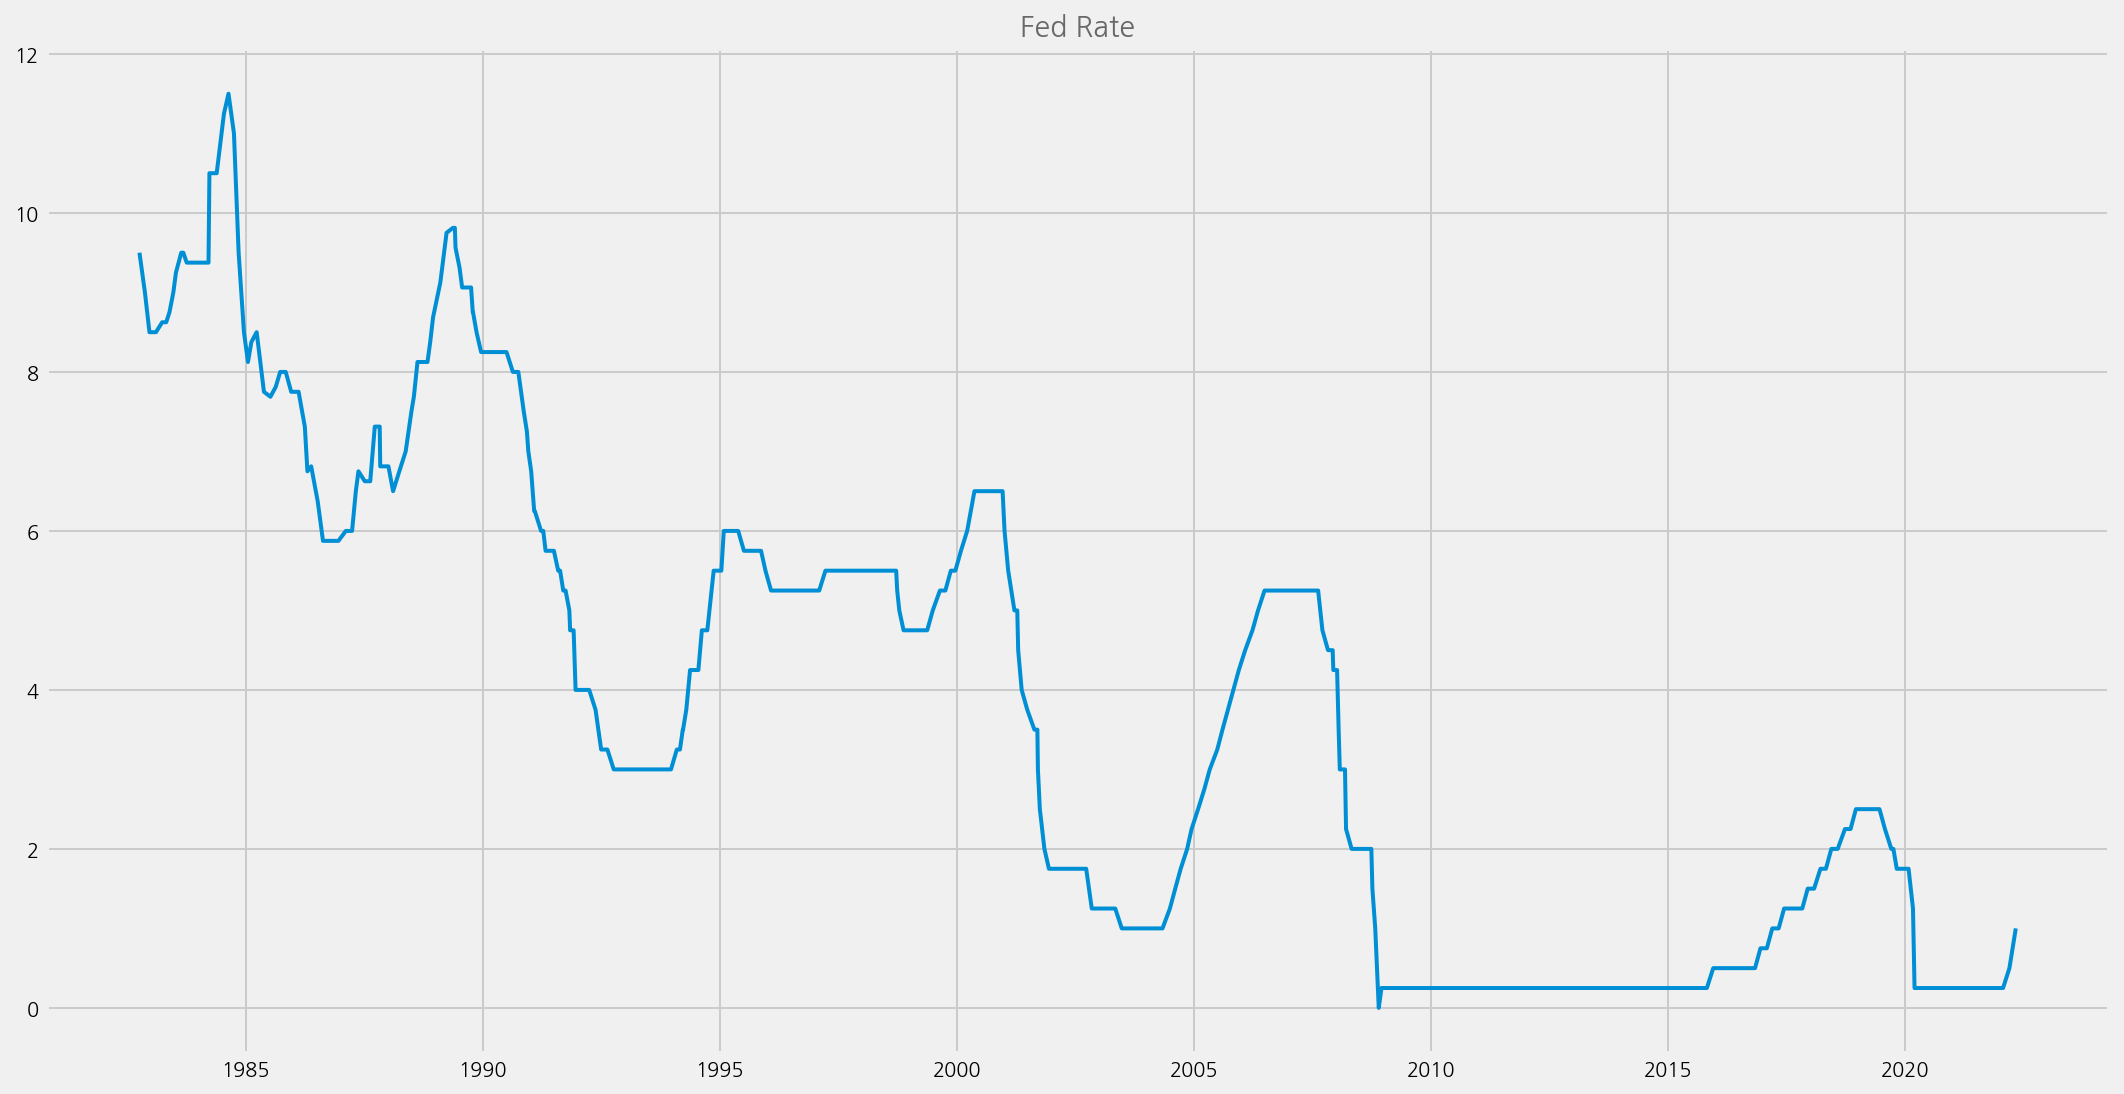

In [8]:
cfg = eKonf.compose('visualize/plot=lineplot')
cfg.plot.y = 'rate'
cfg.figure.figsize = (15, 8)
cfg.ax.title = 'Fed Rate'
eKonf.instantiate(cfg, data=fomc.calendar)

In [35]:
tone_data = tone_data_lm.merge(tone_data_finbert, left_index=True, right_index=True)
tone_data = tone_data.merge(tone_data_t5, left_index=True, right_index=True)
tone_data.index.name = 'date'
tone_data = tone_data[tone_data.index.year >= (start_year-1)]
tone_data

polarity_mean_beigebook  polarity_mean_meeting_script  \
date                                                                
1999-01-03                      NaN                           NaN   
1999-01-04                      NaN                           NaN   
1999-01-11                      NaN                           NaN   
1999-01-15                      NaN                           NaN   
1999-01-20                      NaN                           NaN   
...                             ...                           ...   
2021-11-30                      NaN                           NaN   
2021-12-01                -0.046022                           NaN   
2021-12-02                      NaN                           NaN   
2021-12-15                      NaN                           NaN   
2021-12-17                      NaN                           NaN   

            polarity_mean_minutes  polarity_mean_press_conf  \
date                                                          
1999-01-03                    NaN                       NaN   
1999-01-04                    NaN                       NaN   
1999-01-11                    NaN                       NaN   
1999-01-15                    NaN                       NaN   
1999-01-20                    NaN                       NaN   
...                           ...                       ...   
2021-11-30                    NaN                       NaN   
2021-12-01                    NaN                       NaN   
2021-12-02                    NaN                       NaN   
2021-12-15              -0.043929                 -0.075441   
2021-12-17                    NaN                       NaN   

            polarity_mean_speech  polarity_mean_statement  \
date                                                        
1999-01-03             -0.106322                      NaN   
1999-01-04              0.207071                      NaN   
1999-01-11              0.166667                      NaN   
1999-01-15             -0.086614                      NaN   
1999-01-20                   NaN                      NaN   
...                          ...                      ...   
2021-11-30             -0.167014                      NaN   
2021-12-01                   NaN                      NaN   
2021-12-02             -0.077381                      NaN   
2021-12-15                   NaN                 0.166667   
2021-12-17             -0.356613                      NaN   

            polarity_mean_testimony  polarity_diffusion_beigebook  \
date                                                                
1999-01-03                      NaN                           NaN   
1999-01-04                      NaN                           NaN   
1999-01-11                      NaN                           NaN   
1999-01-15                      NaN                           NaN   
1999-01-20                -0.052444                           NaN   
...                             ...                           ...   
2021-11-30                -0.120000                           NaN   
2021-12-01                      NaN                     -0.048109   
2021-12-02                      NaN                           NaN   
2021-12-15                      NaN                           NaN   
2021-12-17                      NaN                           NaN   

            polarity_diffusion_meeting_script  polarity_diffusion_minutes  \
date                                                                        
1999-01-03                                NaN                         NaN   
1999-01-04                                NaN                         NaN   
1999-01-11                                NaN                         NaN   
1999-01-15                                NaN                         NaN   
1999-01-20                                NaN                         NaN   
...                                       ...                  

In [36]:
cols = [
    'polarity_diffusion_minutes', 'polarity_diffusion_press_conf', 'polarity_diffusion_speech', 'polarity_diffusion_statement',
    'finbert_diffusion_minutes', 'finbert_diffusion_press_conf', 'finbert_diffusion_speech', 'finbert_diffusion_statement',
    't5_diffusion_minutes', 't5_diffusion_press_conf', 't5_diffusion_speech', 't5_diffusion_statement'
]


merged_tone_data = fomc.calendar.copy()

for name in cols:
    offset = dict(months=0, days=1)
    data = tone_data.dropna(subset=[name])
    merged_tone_data = fomc.add_available_latest(
        merged_tone_data, data, name, [name], offset
    )

merged_tone_data = merged_tone_data[(merged_tone_data.index.year >= (start_year-1)) & (merged_tone_data.index.year < 2022)]
eKonf.save_data(merged_tone_data, "fomc_tone_data_merged.parquet", data_dir)
merged_tone_data

100%|██████████| 415/415 [00:00<00:00, 2148.15it/s]


unscheduled  forecast  confcall         speaker  rate  \
date                                                                
1999-02-03        False     False     False  Alan Greenspan  4.75   
1999-03-30        False     False     False  Alan Greenspan  4.75   
1999-05-18        False     False     False  Alan Greenspan  4.75   
1999-06-30        False     False     False  Alan Greenspan  5.00   
1999-08-24        False     False     False  Alan Greenspan  5.25   
...                 ...       ...       ...             ...   ...   
2021-06-16        False      True     False   Jerome Powell  0.25   
2021-07-28        False     False     False   Jerome Powell  0.25   
2021-09-22        False      True     False   Jerome Powell  0.25   
2021-11-03        False     False     False   Jerome Powell  0.25   
2021-12-15        False      True     False   Jerome Powell  0.25   

            rate_change  rate_decision  rate_changed  \
date                                                   
1999-02-03         0.00            0.0             0   
1999-03-30         0.00            0.0             0   
1999-05-18         0.00            0.0             0   
1999-06-30         0.25            1.0             1   
1999-08-24         0.25            1.0             1   
...                 ...            ...           ...   
2021-06-16         0.00            0.0             0   
2021-07-28         0.00            0.0             0   
2021-09-22         0.00            0.0             0   
2021-11-03         0.00            0.0             0   
2021-12-15         0.00            0.0             0   

            polarity_diffusion_minutes polarity_diffusion_minutes_date  ...  \
date                                                                    ...   
1999-02-03                         NaN                             NaT  ...   
1999-03-30                   -0.072464                      1999-02-03  ...   
1999-05-18                   -0.050360                      1999-03-30  ...   
1999-06-30                   -0.028169                      1999-05-18  ...   
1999-08-24                   -0.059524                      1999-06-30  ...   
...                                ...                             ...  ...   
2021-06-16                   -0.040741                      2021-04-28  ...   
2021-07-28                    0.031142                      2021-06-16  ...   
2021-09-22                   -0.069079                      2021-07-28  ...   
2021-11-03                   -0.112403                      2021-09-22  ...   
2021-12-15                   -0.080851                      2021-11-03  ...   

            finbert_diffusion_statement finbert_diffusion_statement_date  \
date                                                                       
1999-02-03                          NaN                              NaT   
1999-03-30                          NaN                              NaT   
1999-05-18                          NaN                              NaT   
1999-06-30                     1.000000                       1999-05-18   
1999-08-24                     0.692308                       1999-06-30   
...                                 ...                              ...   
2021-06-16                     0.615385                       2021-04-28   
2021-07-28                     0.461538                       2021-06-16   
2021-09-22                     0.538462                       2021-07-28   
2021-11-03                     0.571429                       2021-09-22   
2021-12-15                     0.647059                       2021-11-03   

            t5_diffusion_minutes t5_diffusion_minutes_date  \
date                                                         
1999-02-03                   NaN                       NaT   
1999-03-30              0.405797                1999-02-03   
1999-05-18              0.474820                1999-03-30   
1999-06-30              0.514085                1999-05-18

In [57]:
cols = [
    'polarity_diffusion_minutes', 'polarity_diffusion_press_conf', 'polarity_diffusion_speech', 'polarity_diffusion_statement',
    'finbert_diffusion_minutes', 'finbert_diffusion_press_conf', 'finbert_diffusion_speech', 'finbert_diffusion_statement',
    't5_diffusion_minutes', 't5_diffusion_press_conf', 't5_diffusion_speech', 't5_diffusion_statement'
]
diff_cols = []
for col in cols:
    diff_col = col + '_diff'
    diff_cols.append(diff_col)
    merged_tone_data[diff_col] = merged_tone_data[col].rolling(2).mean().diff()

merged_tone_data = merged_tone_data.copy()[merged_tone_data.index.year >= start_year]
eKonf.save_data(merged_tone_data, "fomc_tone_data_merged.parquet", data_dir)
merged_tone_data

unscheduled  forecast  confcall         speaker  rate  \
date                                                                
2000-02-02        False     False     False  Alan Greenspan  5.75   
2000-03-21        False     False     False  Alan Greenspan  6.00   
2000-05-16        False     False     False  Alan Greenspan  6.50   
2000-06-28        False     False     False  Alan Greenspan  6.50   
2000-08-22        False     False     False  Alan Greenspan  6.50   
...                 ...       ...       ...             ...   ...   
2021-06-16        False      True     False   Jerome Powell  0.25   
2021-07-28        False     False     False   Jerome Powell  0.25   
2021-09-22        False      True     False   Jerome Powell  0.25   
2021-11-03        False     False     False   Jerome Powell  0.25   
2021-12-15        False      True     False   Jerome Powell  0.25   

            rate_change  rate_decision  rate_changed  \
date                                                   
2000-02-02         0.25            1.0             1   
2000-03-21         0.25            1.0             1   
2000-05-16         0.50            1.0             1   
2000-06-28         0.00            0.0             0   
2000-08-22         0.00            0.0             0   
...                 ...            ...           ...   
2021-06-16         0.00            0.0             0   
2021-07-28         0.00            0.0             0   
2021-09-22         0.00            0.0             0   
2021-11-03         0.00            0.0             0   
2021-12-15         0.00            0.0             0   

            polarity_diffusion_minutes polarity_diffusion_minutes_date  ...  \
date                                                                    ...   
2000-02-02                   -0.128571                      1999-12-21  ...   
2000-03-21                   -0.074866                      2000-02-02  ...   
2000-05-16                    0.015873                      2000-03-21  ...   
2000-06-28                   -0.100840                      2000-05-16  ...   
2000-08-22                   -0.198276                      2000-06-28  ...   
...                                ...                             ...  ...   
2021-06-16                   -0.040741                      2021-04-28  ...   
2021-07-28                    0.031142                      2021-06-16  ...   
2021-09-22                   -0.069079                      2021-07-28  ...   
2021-11-03                   -0.112403                      2021-09-22  ...   
2021-12-15                   -0.080851                      2021-11-03  ...   

            polarity_diffusion_statement_diff finbert_diffusion_minutes_diff  \
date                                                                           
2000-02-02                                NaN                            NaN   
2000-03-21                                NaN                            NaN   
2000-05-16                           0.011134                       0.018254   
2000-06-28                           0.131579                       0.106570   
2000-08-22                           0.065789                       0.018199   
...                                       ...                            ...   
2021-06-16                           0.076923                       0.025890   
2021-07-28                           0.067308                      -0.035400   
2021-09-22                           0.076923                      -0.027412   
2021-11-03                           0.021978                       0.005512   
2021-12-15                          -0.142534                       0.047270   

            finbert_diffusion_press_conf_diff finbert_diffusion_speech_diff  \
date                                                                          
2000-02-02                                NaN                           NaN   
2000-03-21                                NaN                           NaN   


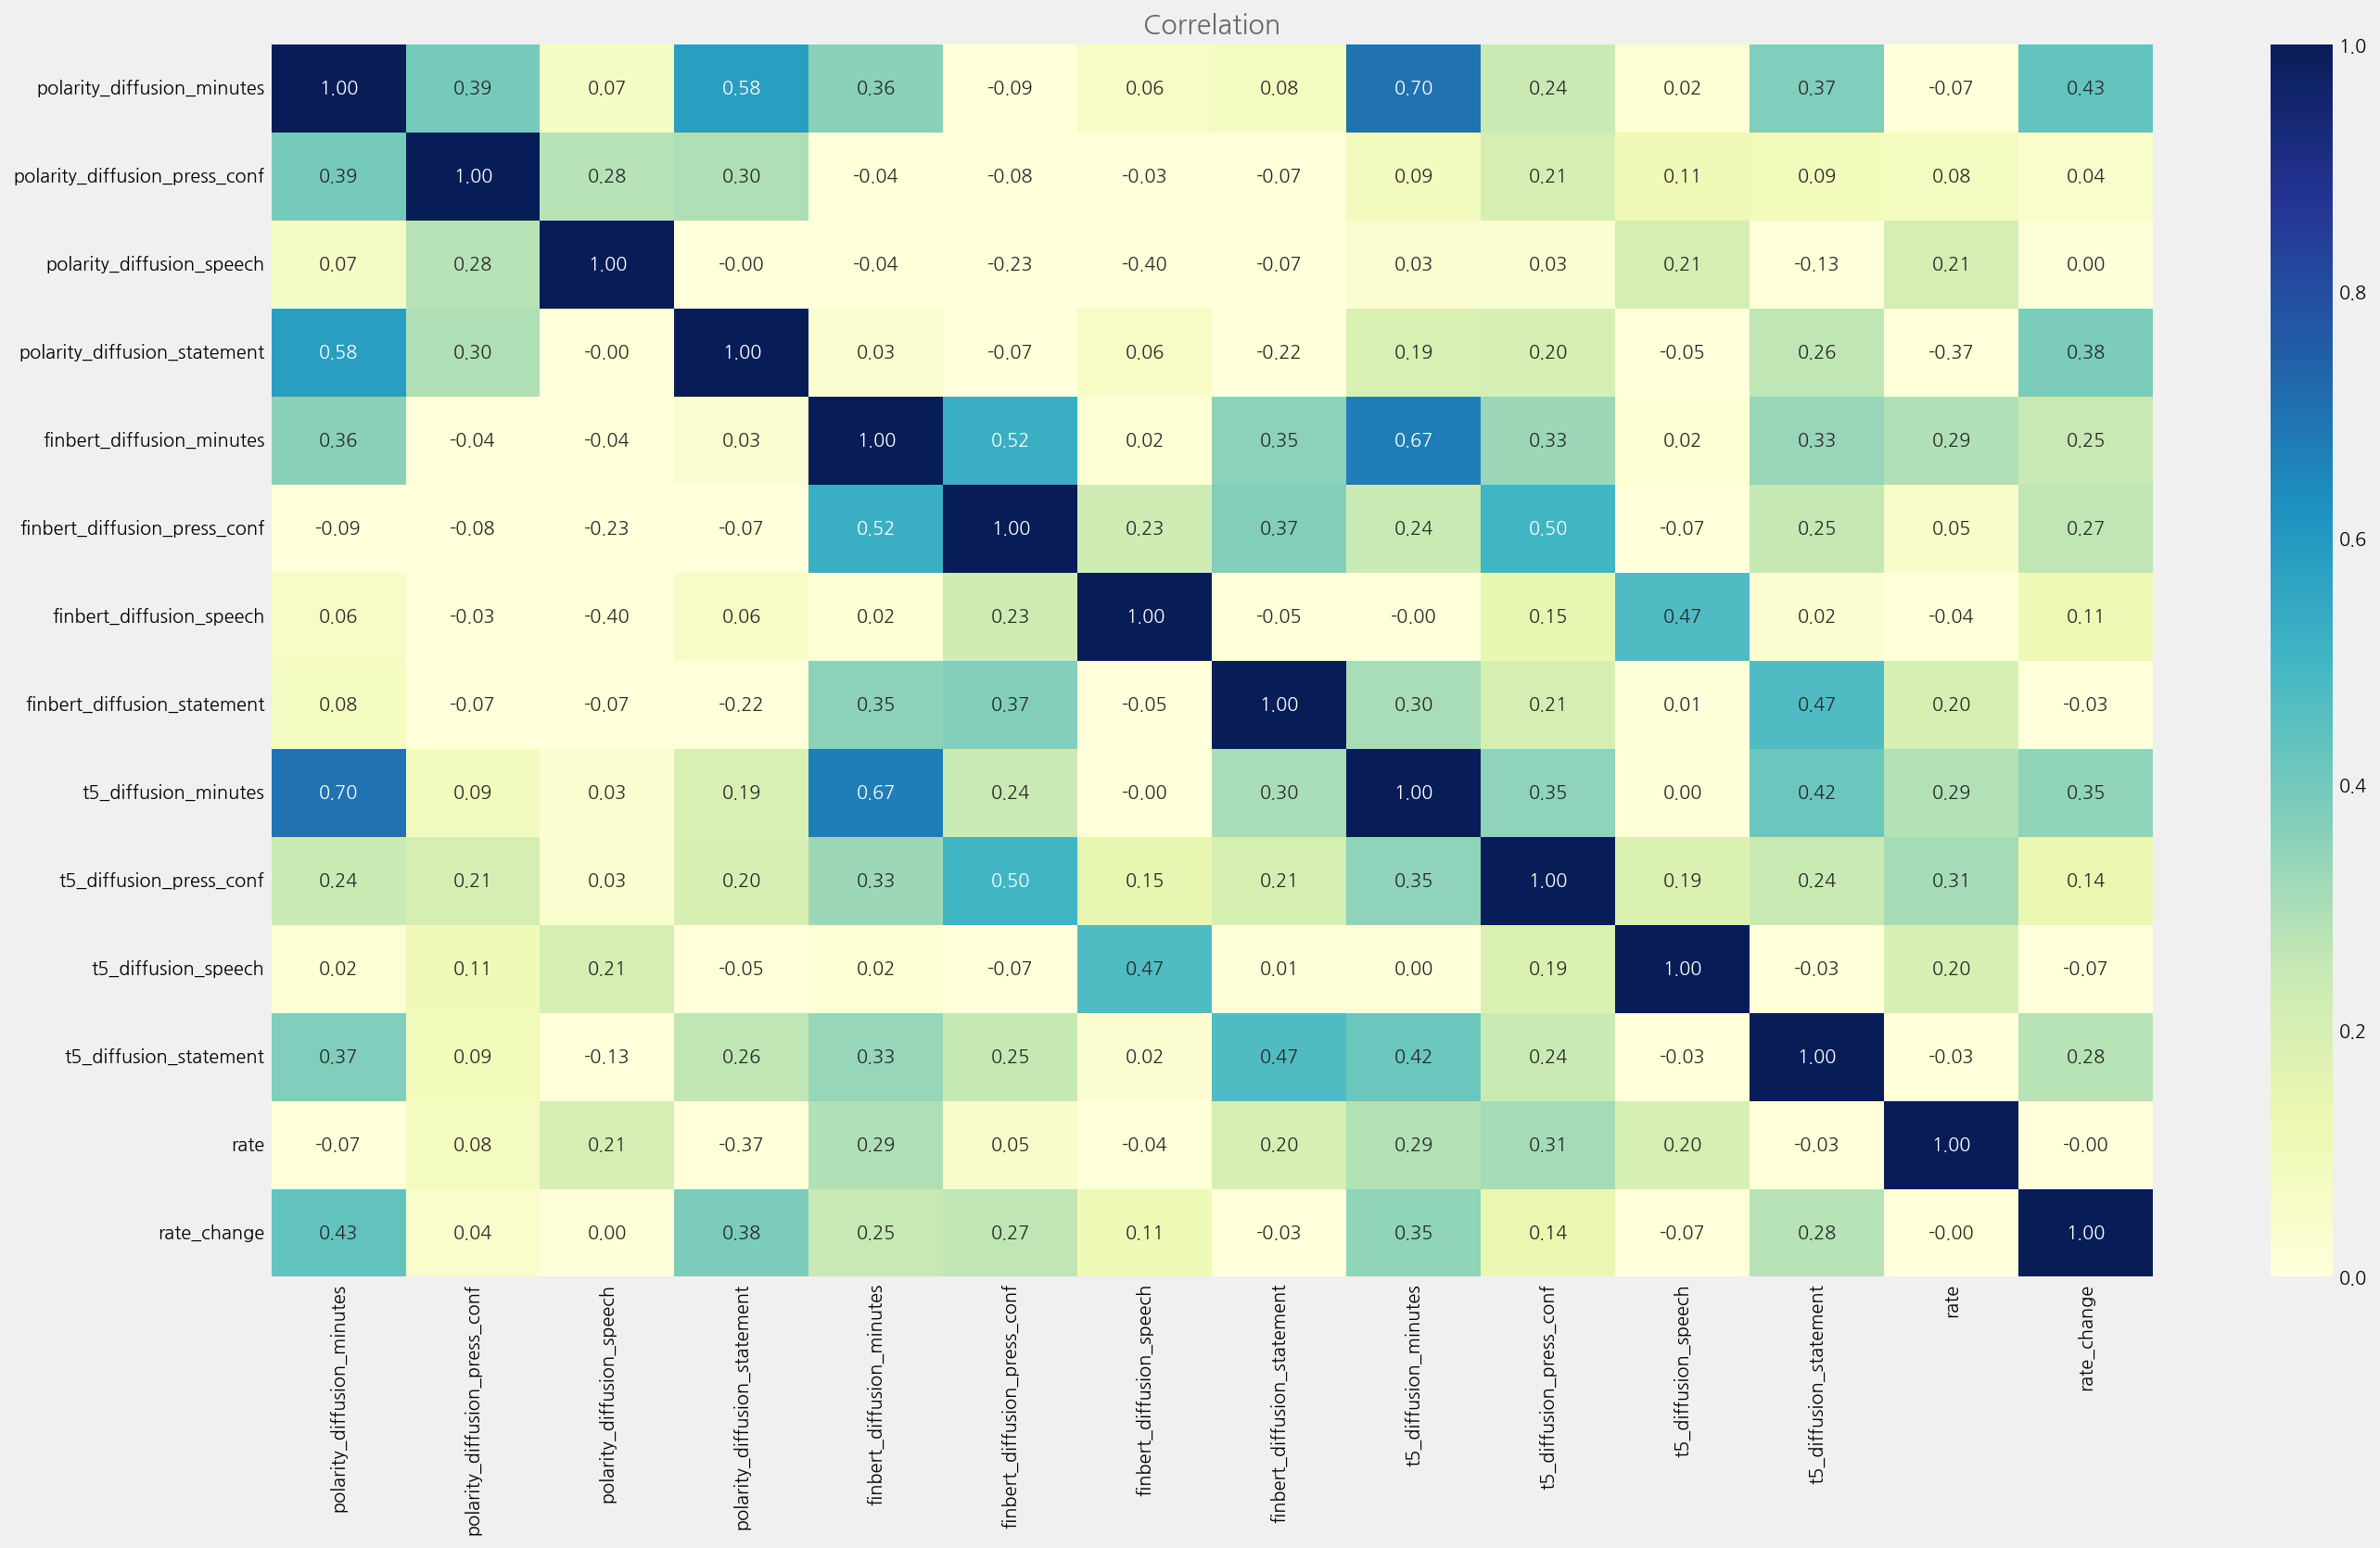

In [38]:
corr_columns = cols + ["rate", "rate_change"]
corr_data = merged_tone_data[corr_columns].astype(float).corr()

cfg = eKonf.compose("visualize/plot=heatmap")
cfg.figure.figsize = (20, 12)
cfg.heatmap.cmap = "YlGnBu"
cfg.heatmap.vmin = 0
cfg.heatmap.vmax = 1
cfg.heatmap.fmt = ".2f"
cfg.ax.title = "Correlation"
eKonf.instantiate(cfg, data=corr_data)

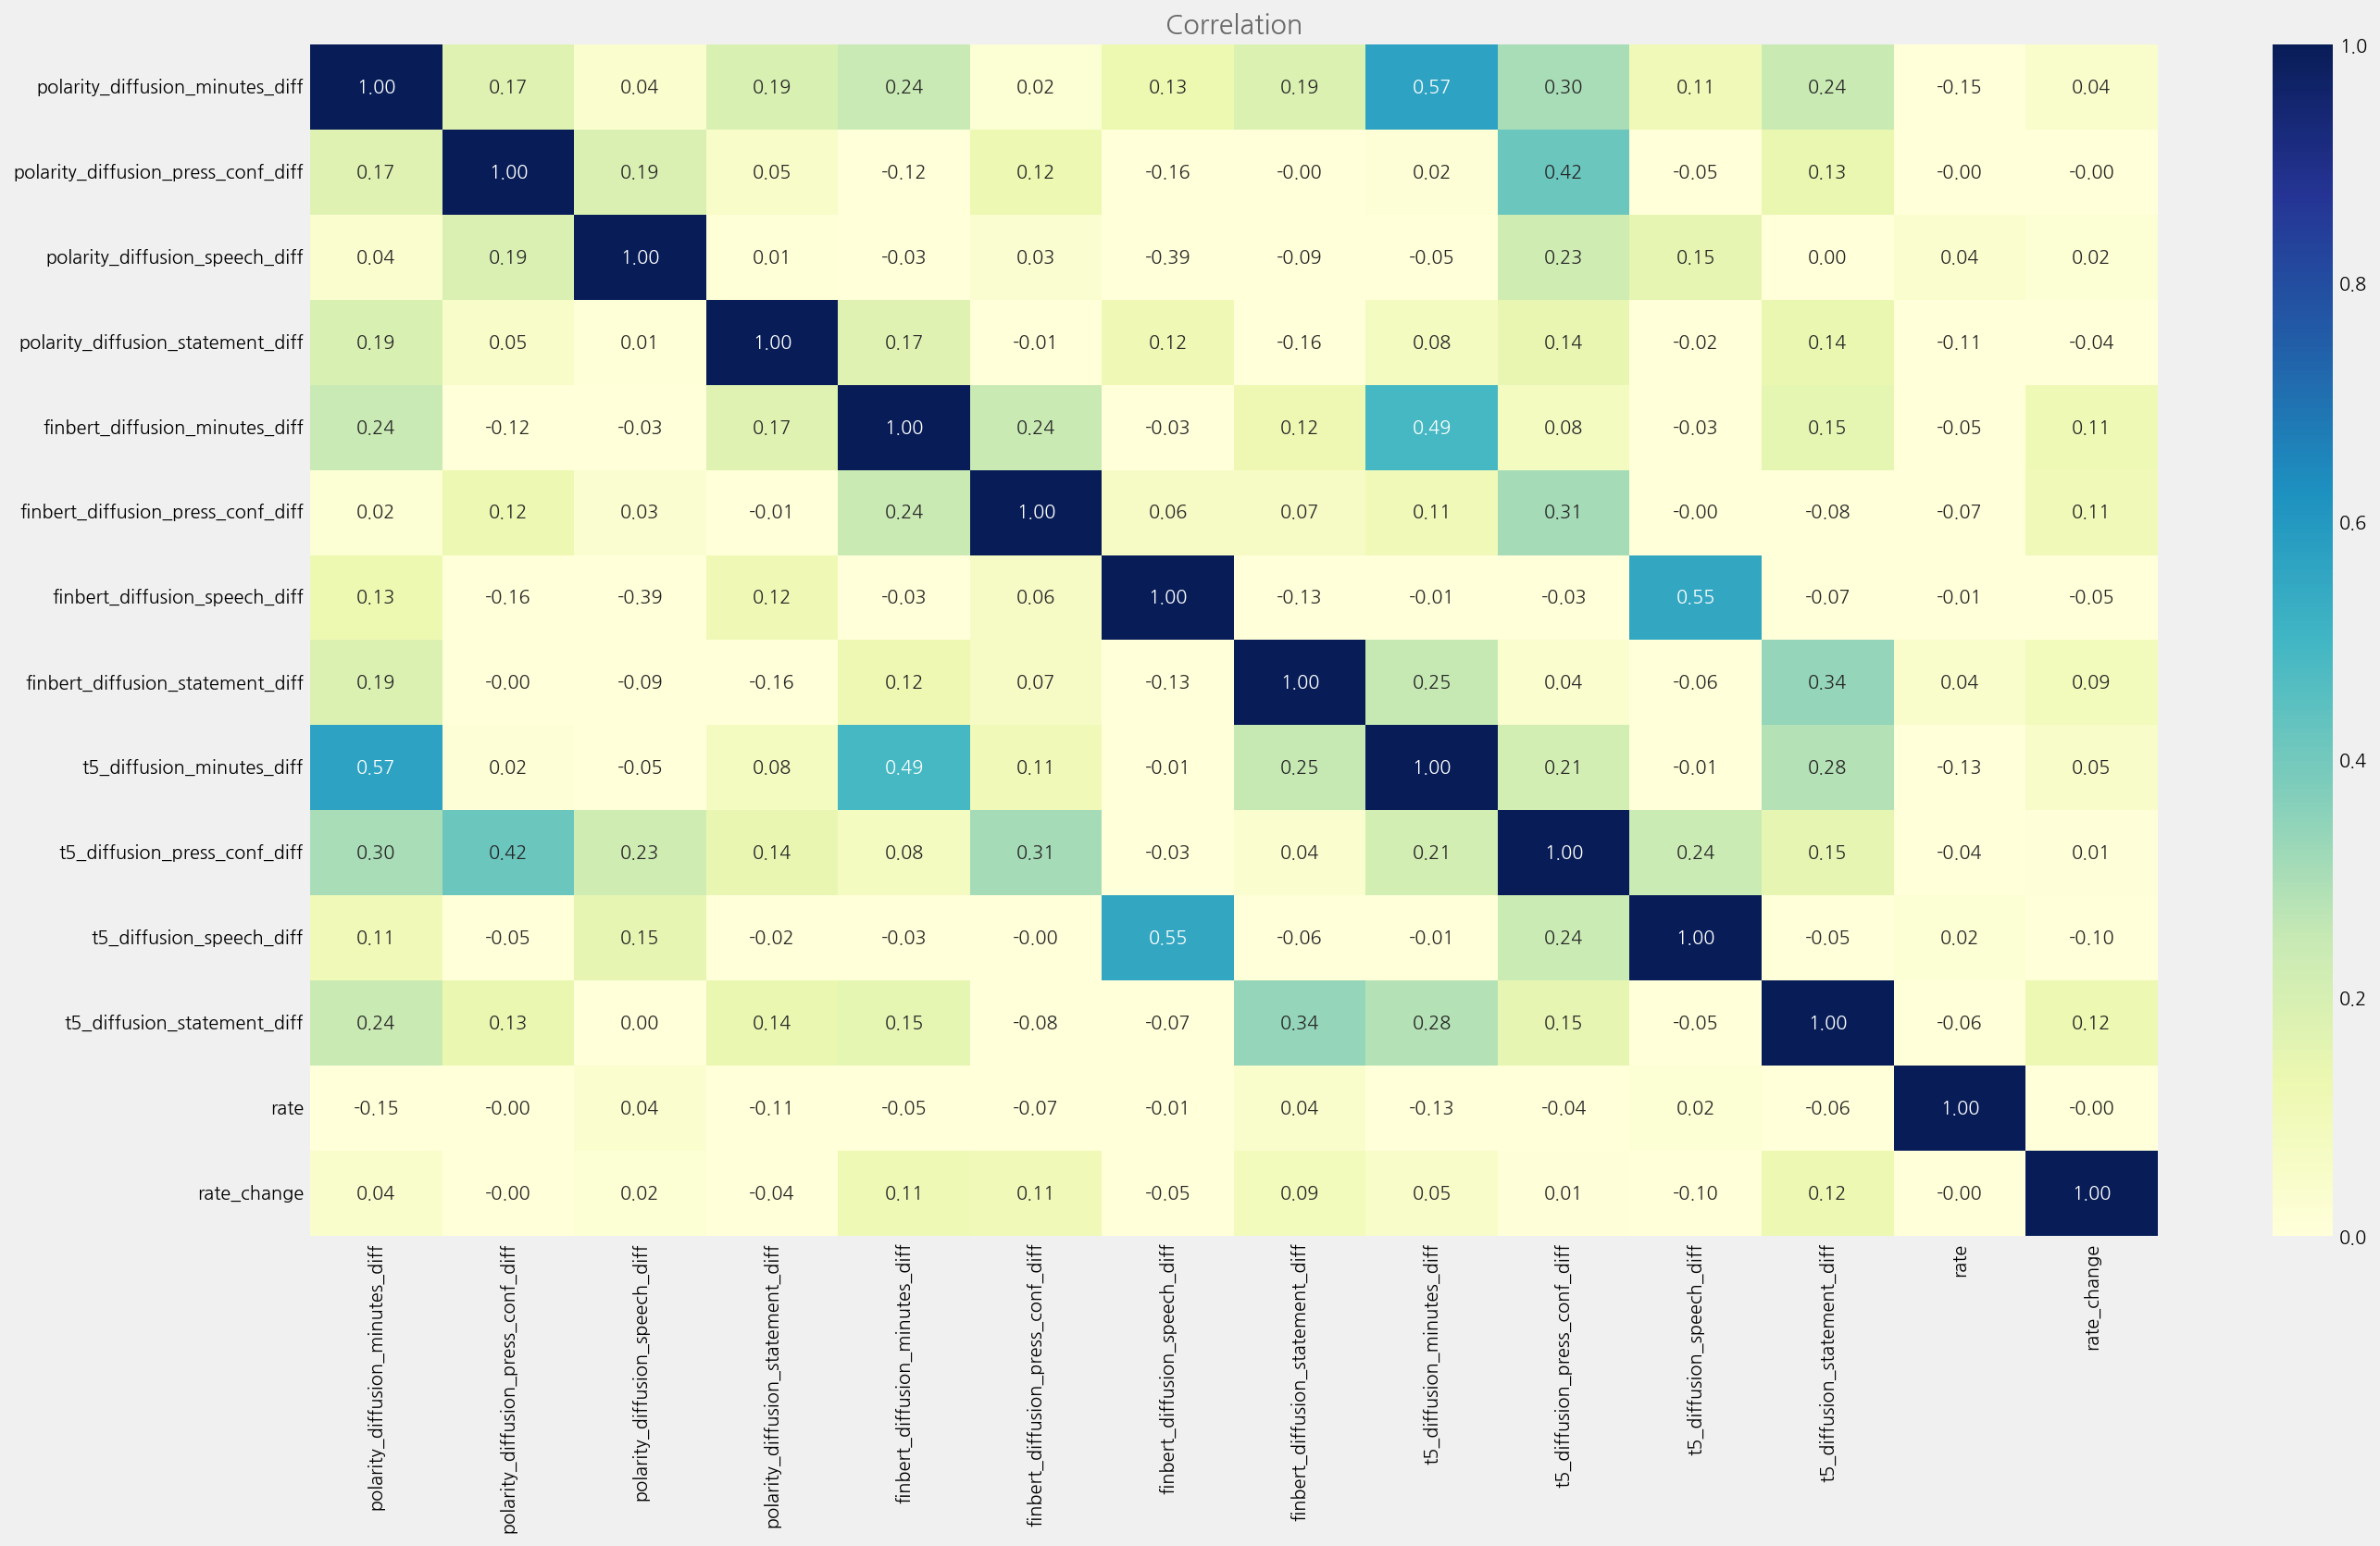

In [39]:
corr_columns = diff_cols + ["rate", "rate_change"]
corr_data = merged_tone_data[corr_columns].astype(float).corr()

cfg = eKonf.compose("visualize/plot=heatmap")
cfg.figure.figsize = (20, 12)
cfg.heatmap.cmap = "YlGnBu"
cfg.heatmap.vmin = 0
cfg.heatmap.vmax = 1
cfg.heatmap.fmt = ".2f"
cfg.ax.title = "Correlation"
eKonf.instantiate(cfg, data=corr_data)

## Plot the sentiment scores

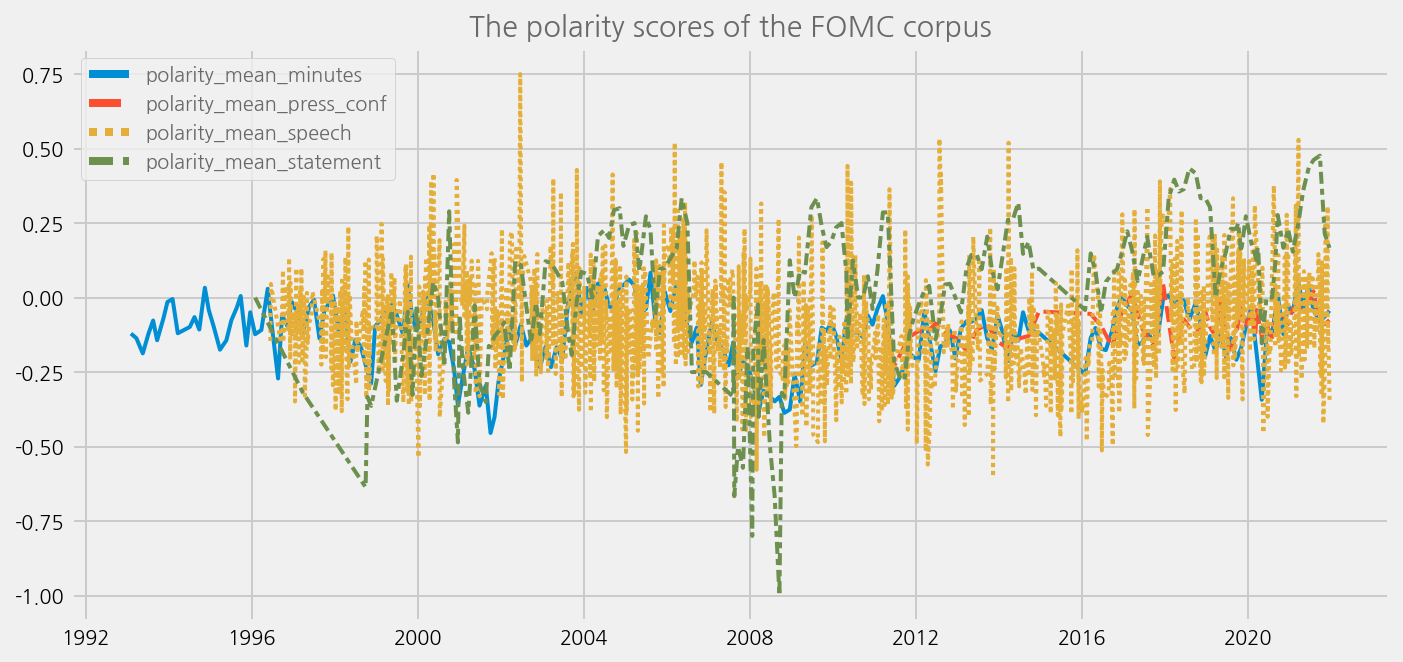

In [51]:
cfg = eKonf.compose('visualize/plot=lineplot')
cfg.plot.y = ['polarity_mean_minutes', 'polarity_mean_press_conf', 'polarity_mean_speech', 'polarity_mean_statement']
cfg.ax.title = 'The polarity scores of the FOMC corpus'
eKonf.instantiate(cfg, data=tone_data_lm)

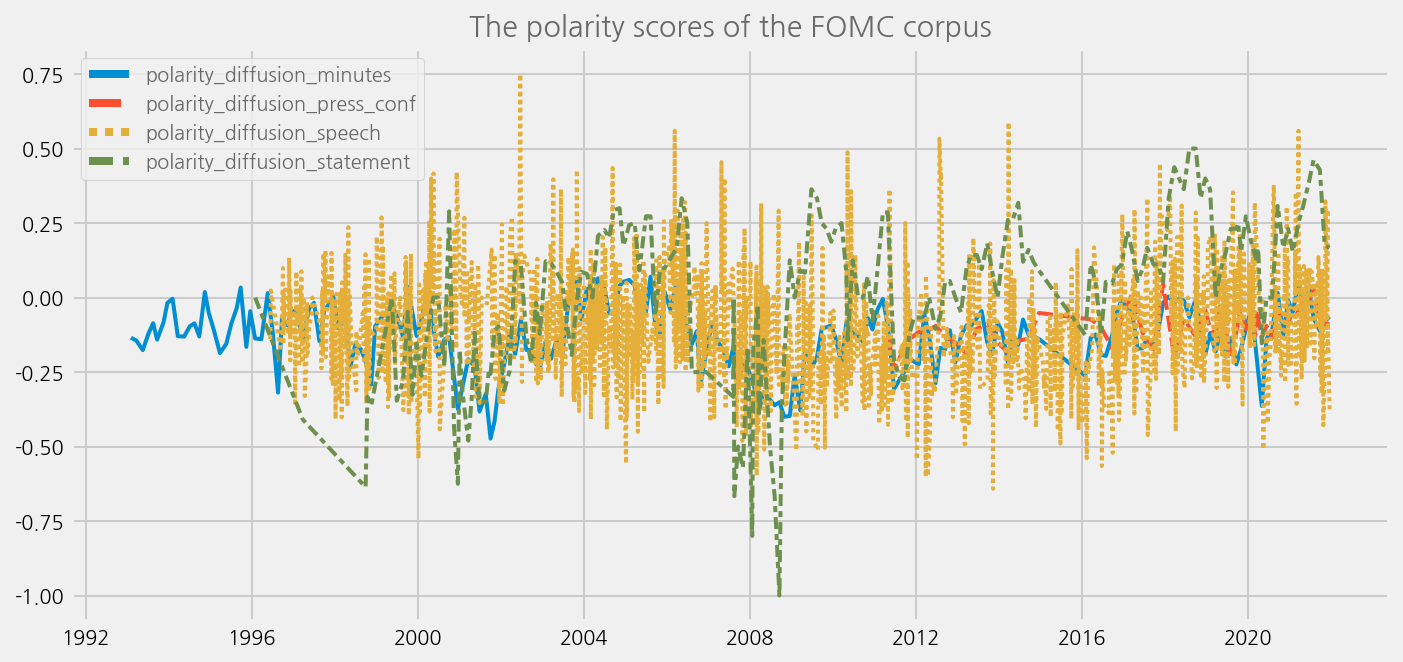

In [47]:
cfg = eKonf.compose('visualize/plot=lineplot')
cfg.plot.y = ['polarity_diffusion_minutes', 'polarity_diffusion_press_conf', 'polarity_diffusion_speech', 'polarity_diffusion_statement']
cfg.ax.title = 'The polarity scores of the FOMC corpus'
eKonf.instantiate(cfg, data=tone_data_lm)


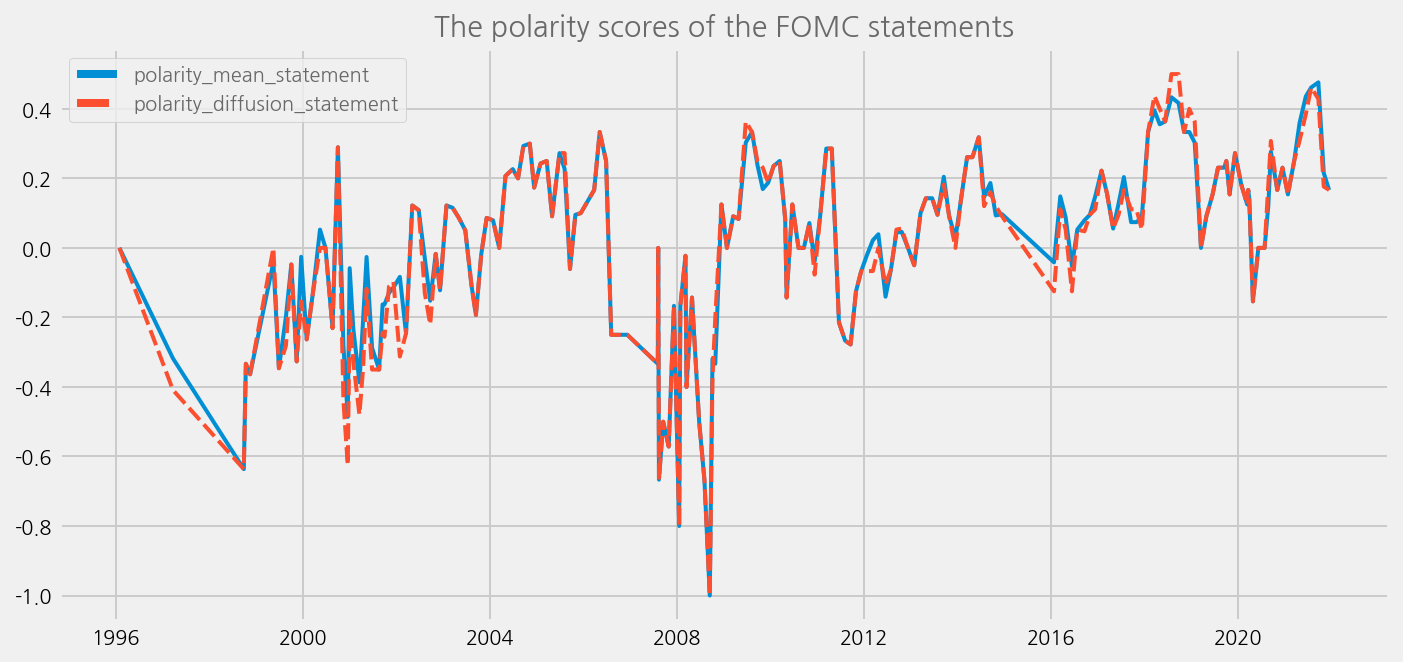

In [48]:
cfg = eKonf.compose('visualize/plot=lineplot')
cfg.plot.y = ['polarity_mean_statement', 'polarity_diffusion_statement']
cfg.ax.title = 'The polarity scores of the FOMC statements'
eKonf.instantiate(cfg, data=tone_data_lm)

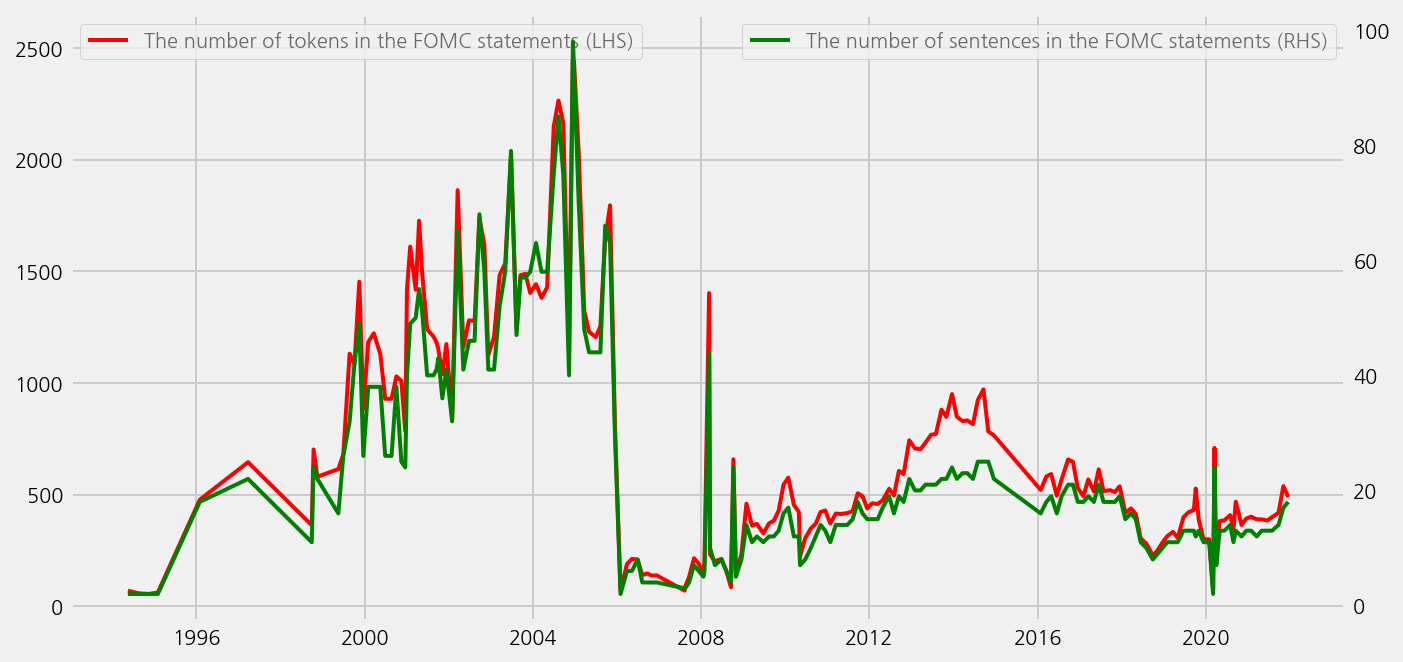

In [49]:
cfg = eKonf.compose('visualize/plot=lineplot')
cfg.plots.append(cfg.plot.copy())
cfg.plots[0].y = "num_tokens_sum_statement"
cfg.plots[0].rcParams = dict(linewidth=2.5, color="red")
cfg.plots[1].y = "num_examples_statement"
cfg.plots[1].rcParams = dict(linewidth=1.5, color="green")
cfg.plots[1].secondary_y = True
cfg.ax.legend = dict(
    labels=[
        "The number of tokens in the FOMC statements (LHS)",
    ],
    loc=2,
)
ax2 = cfg.ax.copy()
ax2.grid = False
ax2.secondary_y = True
ax2.legend = dict(
    labels=["The number of sentences in the FOMC statements (RHS)"],
    loc=1,
)
cfg.axes.append(ax2)

eKonf.instantiate(cfg, data=tone_data_lm)

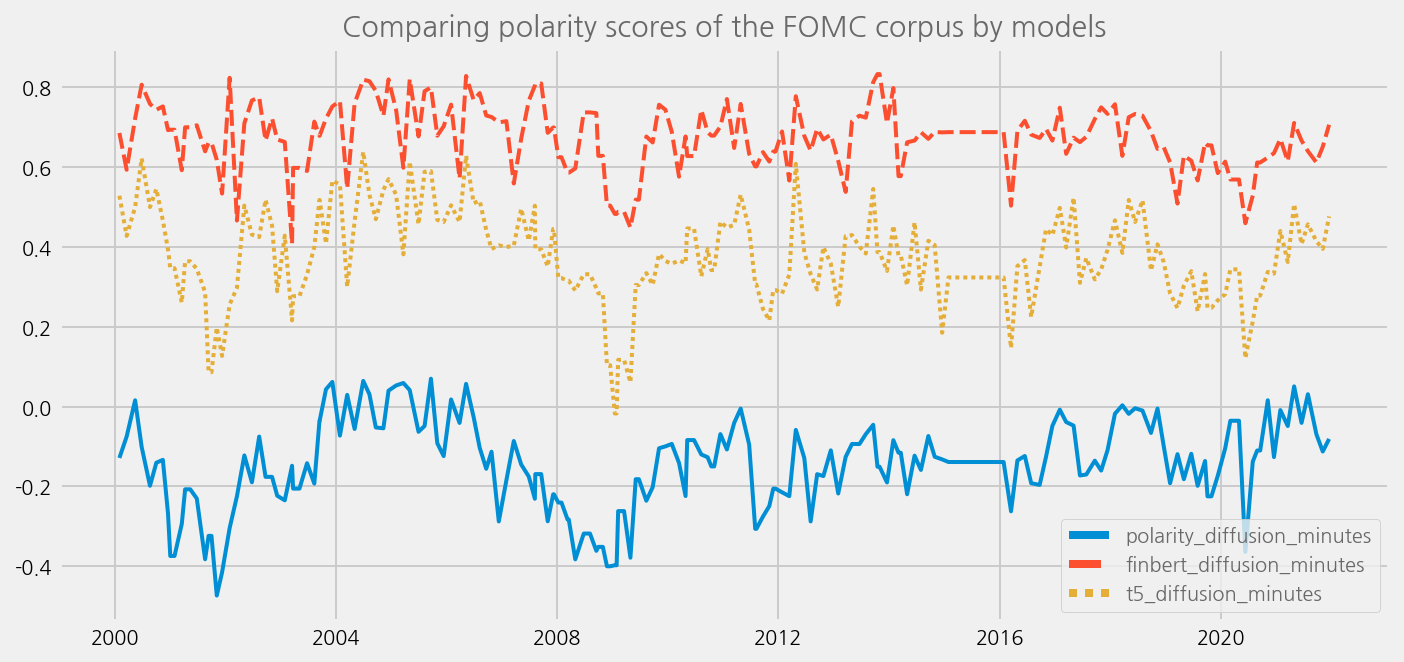

In [50]:
cfg = eKonf.compose('visualize/plot=lineplot')
cfg.plot.y = ['polarity_diffusion_minutes', 'finbert_diffusion_minutes', 't5_diffusion_minutes']
cfg.ax.title = 'Comparing polarity scores of the FOMC corpus by models'
eKonf.instantiate(cfg, data=merged_tone_data)

### Plot the results and compare to the economical uncertainty / systemic risk periods

In [60]:
def plot_sentiments_over_crisis_periods(name='polarity_diffusion_statement', window=2):
    recessions = fomc.recessions.to_dict(orient="records")

    span_args = eKonf.compose("visualize/plot/ax/axvspan")
    annot_args = eKonf.compose("visualize/plot/ax/annotation")
    span_args.color = "crimson"
    span_args.alpha = 0.4

    spans = []
    annotations = []
    for span in recessions:
        annotation = span["name"]
        start = span["from_date"]
        end = span["to_date"]
        span = span_args.copy()
        span.xmin, span.xmax = eKonf.to_dateparm(start), eKonf.to_dateparm(end)

        x = start + (end - start) / 2
        y = -0.75
        annot = annot_args.copy()
        annot.text, annot.x, annot.y = annotation, eKonf.to_dateparm(x), y
        spans.append(span)
        annotations.append(annot)


    merged_tone_data["polarity_ma"] = merged_tone_data[name].rolling(window).mean()

    cfg = eKonf.compose("visualize/plot=lineplot")
    cfg.plots.append(cfg.plot.copy())
    cfg.plots[0].y = "polarity_ma"
    cfg.plots[0].linewidth = 2.5
    cfg.plots[0].palette = "r"
    cfg.plots[1].y = name
    cfg.plots[1].linewidth = 1.5
    cfg.plots[1].palette = "g"
    cfg.ax.title = f"Polarity scores of {name}"
    cfg.ax.legend.labels = [
        f"{window} period MA",
        f"Polarity score of {name}",
    ]
    cfg.ax.axvspans = spans
    cfg.ax.annotations = annotations
    eKonf.instantiate(cfg, data=merged_tone_data)        

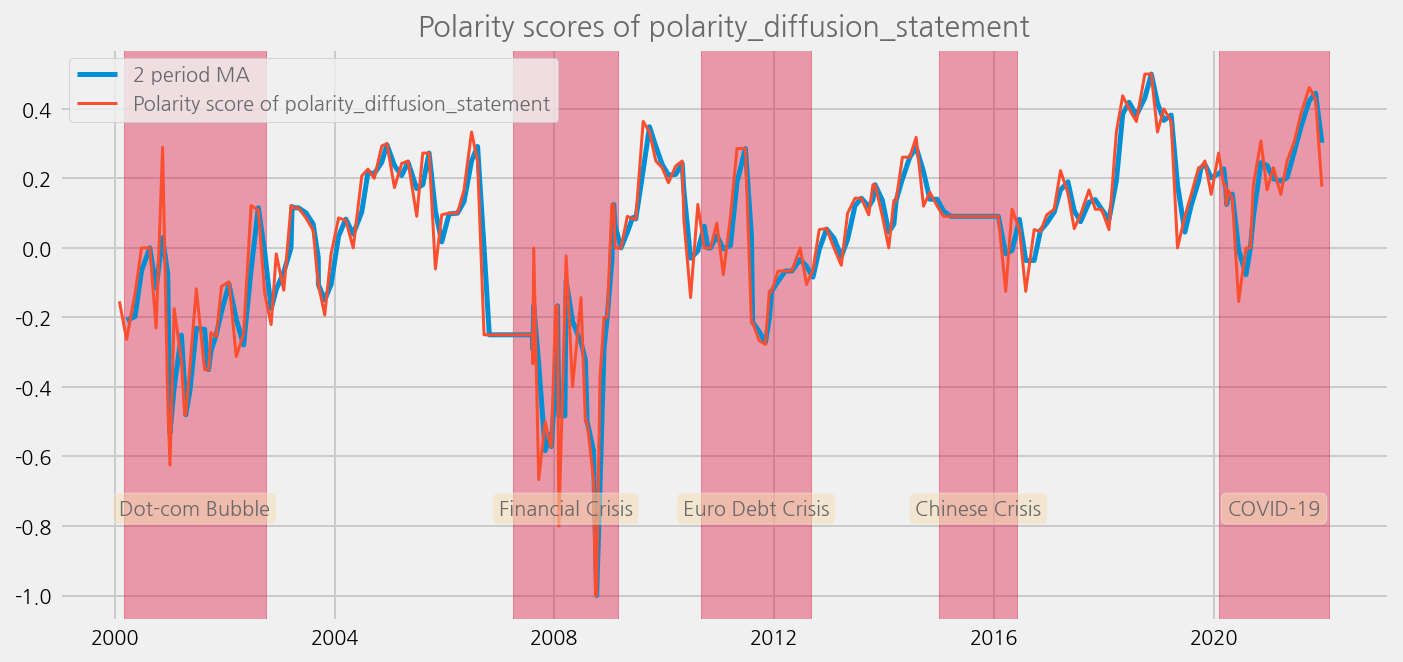

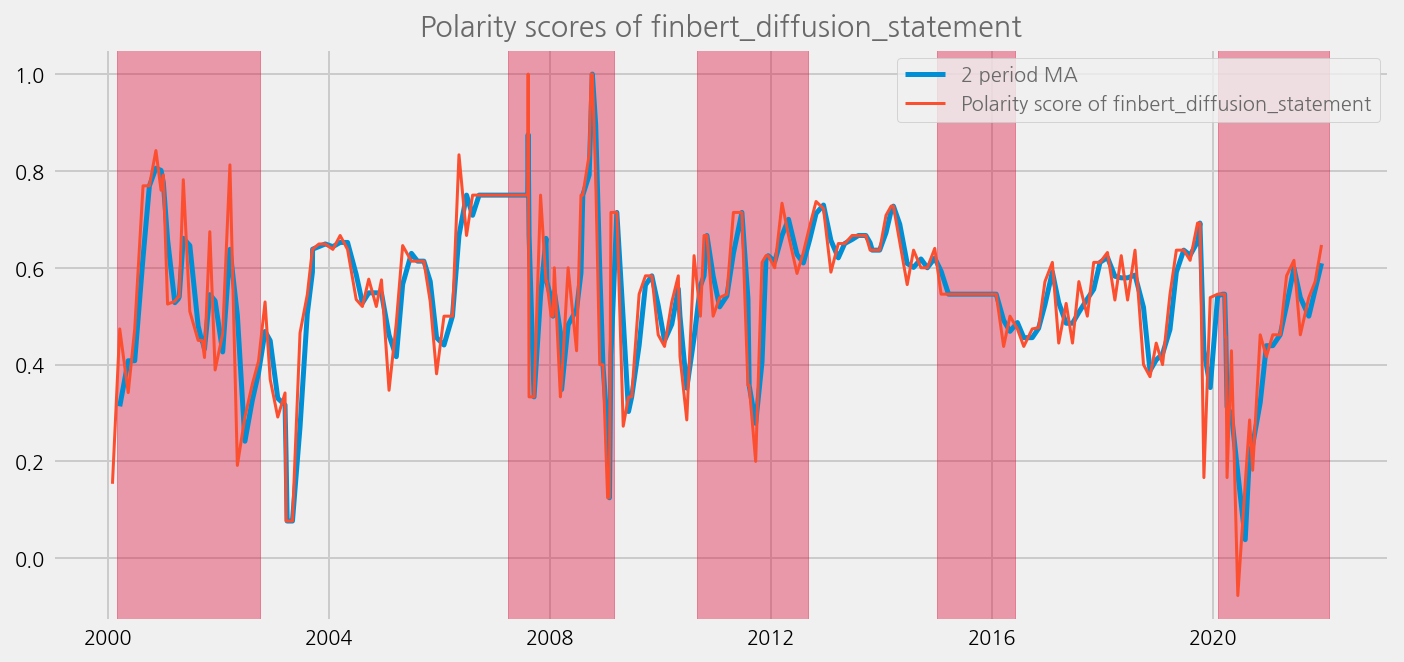

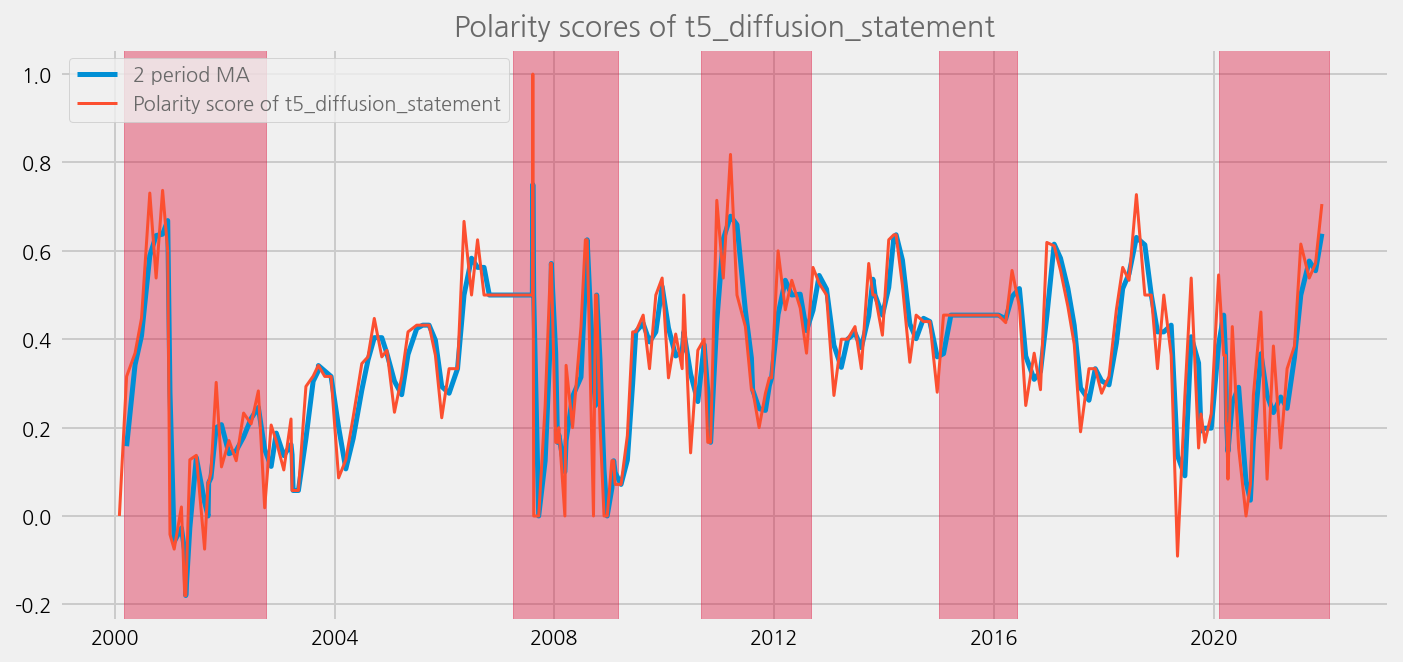

In [61]:
sentiments = ['polarity_diffusion_statement', 'finbert_diffusion_statement', 't5_diffusion_statement']
for name in sentiments:
    plot_sentiments_over_crisis_periods(name)

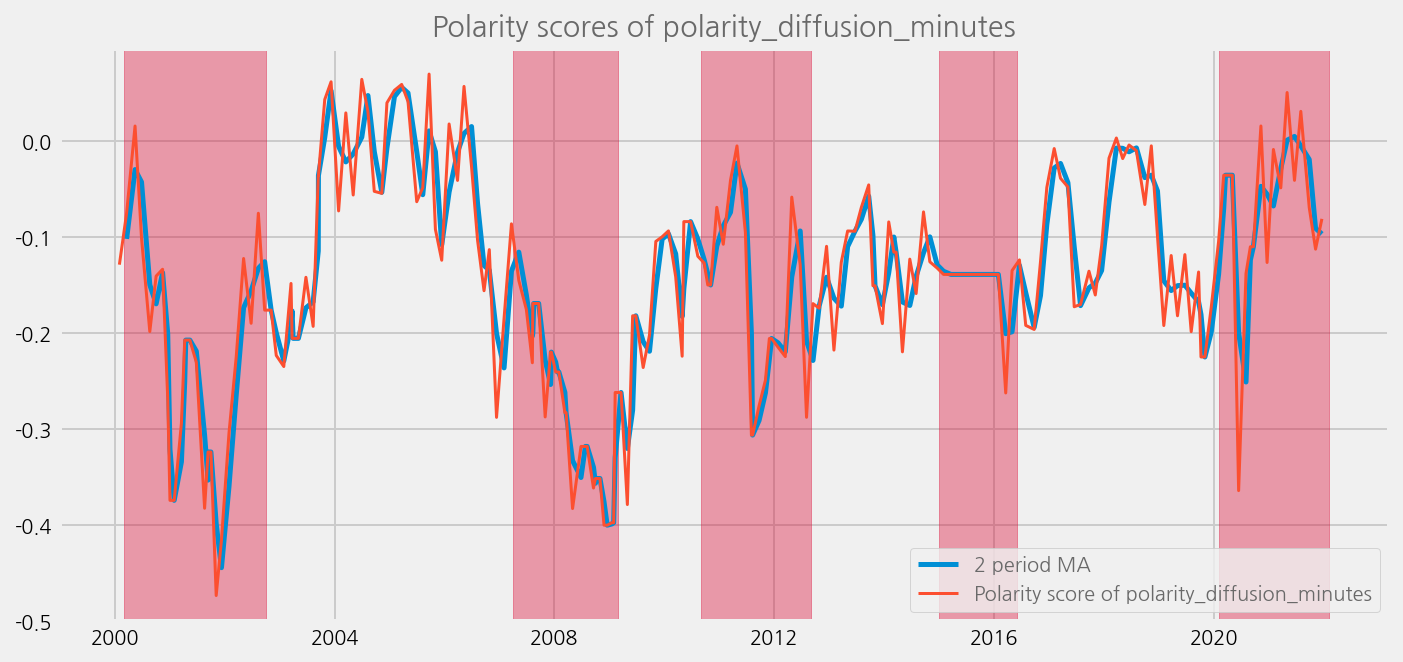

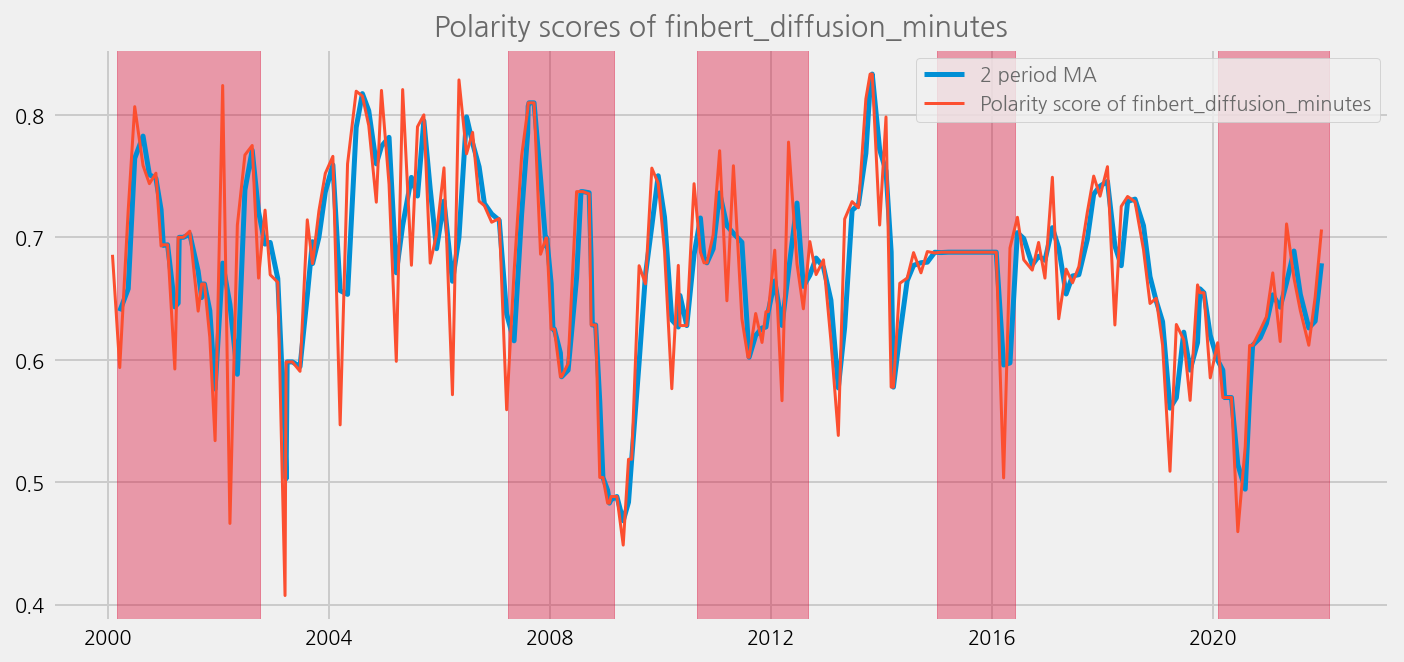

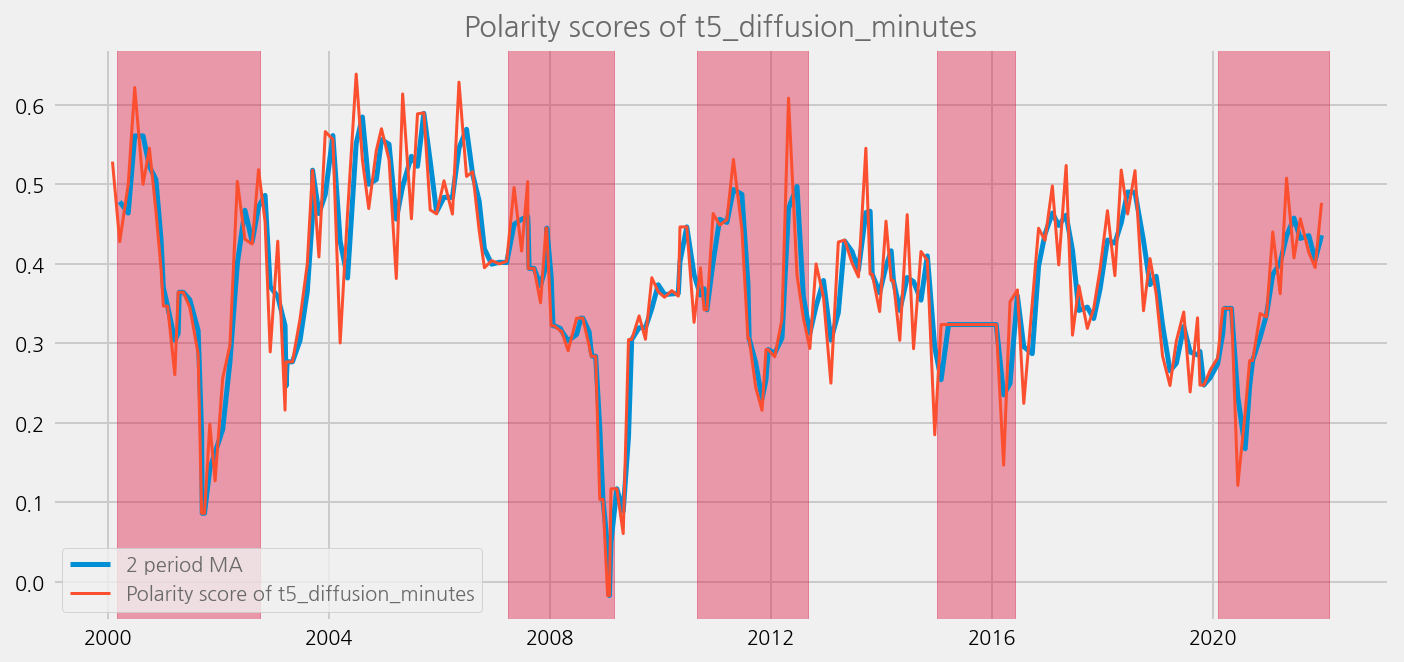

In [62]:
sentiments = ['polarity_diffusion_minutes', 'finbert_diffusion_minutes', 't5_diffusion_minutes']
for name in sentiments:
    plot_sentiments_over_crisis_periods(name)

In [63]:
from datetime import datetime

chair = fomc.chairpersons
chair = chair[chair.to_date.dt.year >= start_year]


def plot_sentiments_over_chair_periods(name='polarity_diffusion_statement', window=3):

    annot_args = eKonf.compose("visualize/plot/ax/annotation")

    spans = []
    annotations = []
    for row in chair.iterrows():
        row_num = row[0]
        start = row[1]["from_date"]
        if start.year < start_year:
            start = datetime(2000, 1, 1)
        end = row[1]["to_date"]
        annotation = row[1]["last_name"]
        color = "crimson" if row_num % 2 == 0 else "darkblue"
        alpha = 0.4 if row_num % 2 == 0 else 0.2
        span = {
            "xmin": eKonf.to_dateparm(start),
            "xmax": eKonf.to_dateparm(end),
            "alpha": alpha,
            "color": color,
        }

        x = start + (end - start) / 2
        y = -0.75
        annot = annot_args.copy()
        annot.text, annot.x, annot.y = annotation, eKonf.to_dateparm(x), y

        spans.append(span)
        annotations.append(annot)

        
    merged_tone_data["polarity_ma"] = merged_tone_data[name].rolling(window).mean()
        
    cfg = eKonf.compose("visualize/plot=lineplot")
    ax2 = cfg.ax.copy()

    cfg.plots.append(cfg.plot.copy())
    cfg.plots[0].y = "polarity_ma"
    cfg.plots[0].rcParams = dict(linewidth=2.5, color="red")
    cfg.plots[1].y = name
    cfg.plots[1].rcParams = dict(linewidth=1.5, color="green")
    cfg.ax.title = f"Polarity scores of {name}"
    cfg.ax.legend = dict(
        labels=[
            f"{window} period MA",
            f"Polarity score of {name}",
        ],
        loc=2,
    )
    scatter_cfg = eKonf.compose("visualize/plot/scatterplot")
    scatter_cfg.y = "rate"
    scatter_cfg.secondary_y = True
    scatter_cfg.rcParams = dict(color="blue", alpha=0.8)
    cfg.plots.append(scatter_cfg)

    ax2.grid = False
    ax2.secondary_y = True
    ax2.ylim = "(-4, 10)"
    ax2.legend = dict(
        labels=["Fed Rate"],
        loc=1,
    )
    cfg.axes.append(ax2)
    cfg.ax.axvspans = spans
    cfg.ax.annotations = annotations

    eKonf.instantiate(cfg, data=merged_tone_data)


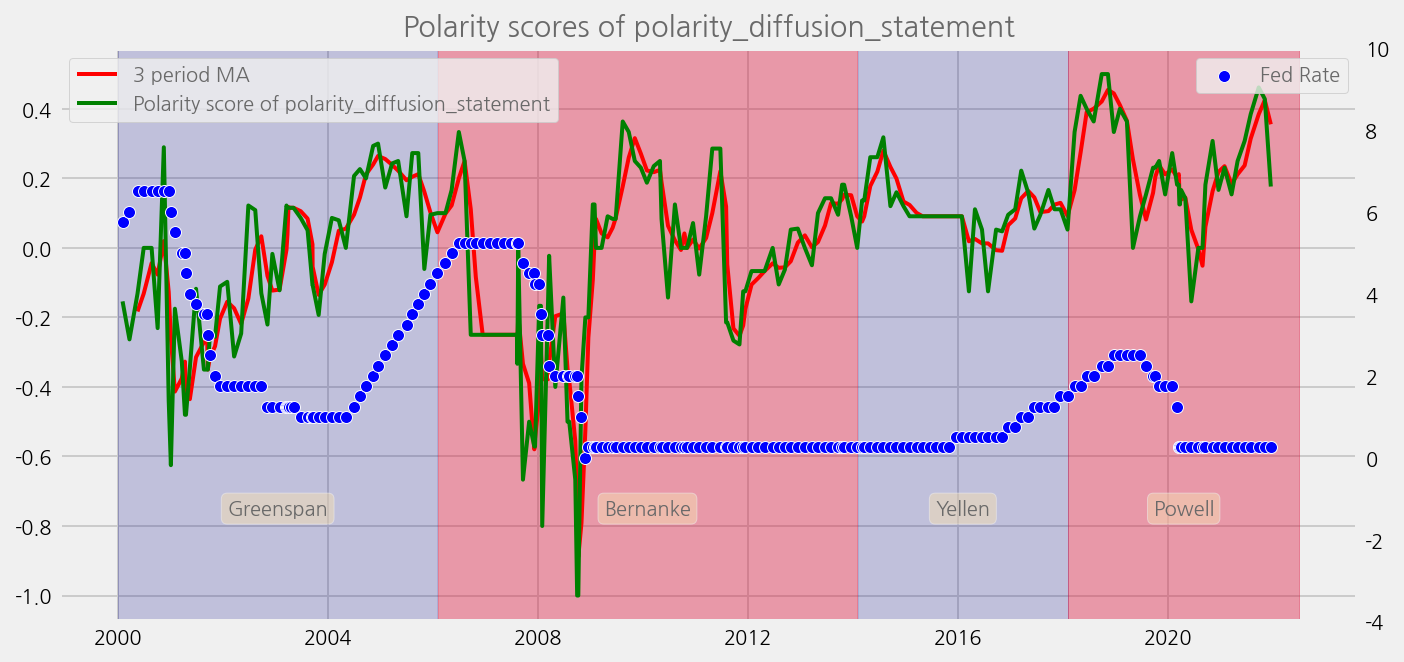

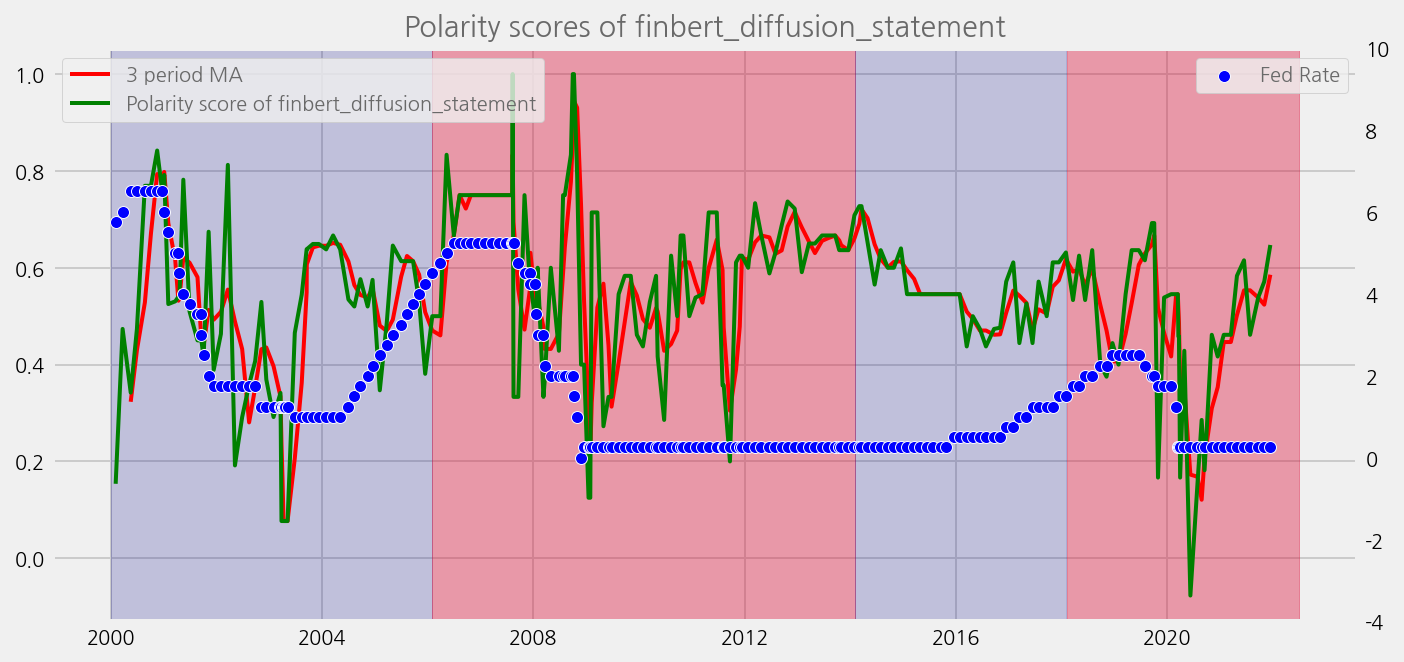

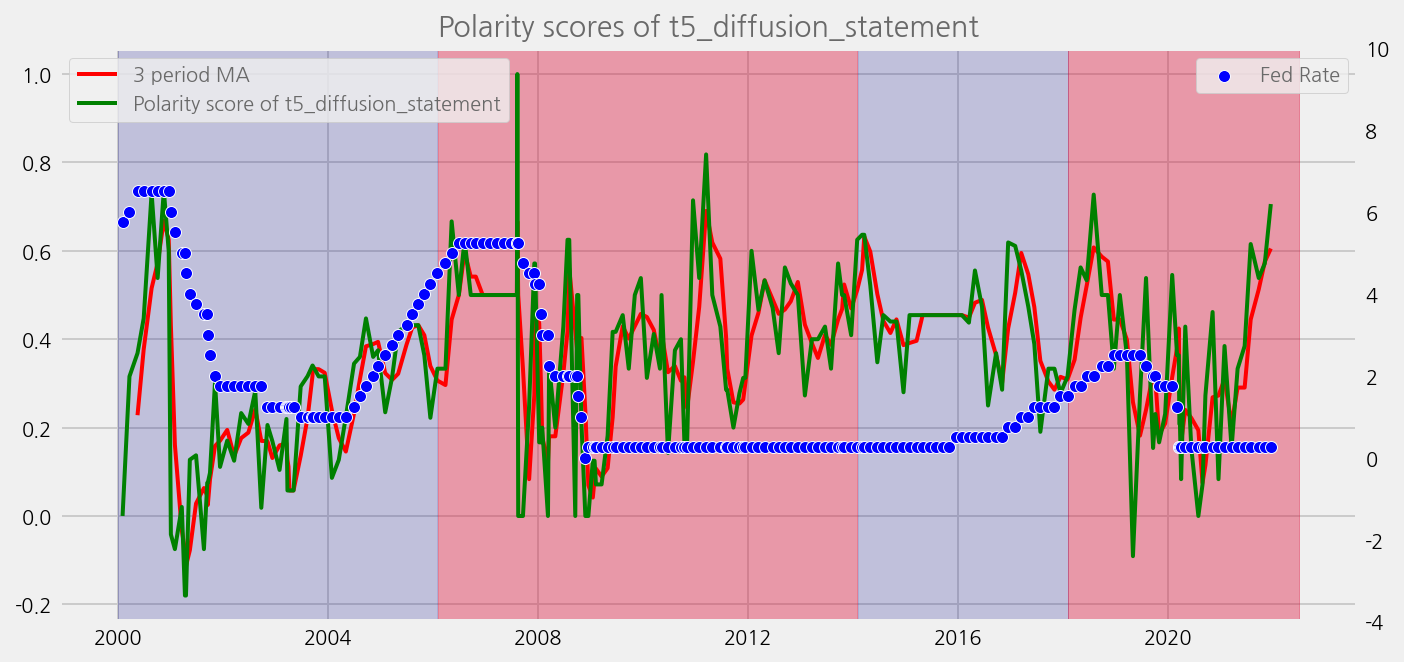

In [64]:
sentiments = ['polarity_diffusion_statement', 'finbert_diffusion_statement', 't5_diffusion_statement']
for name in sentiments:
    plot_sentiments_over_chair_periods(name)

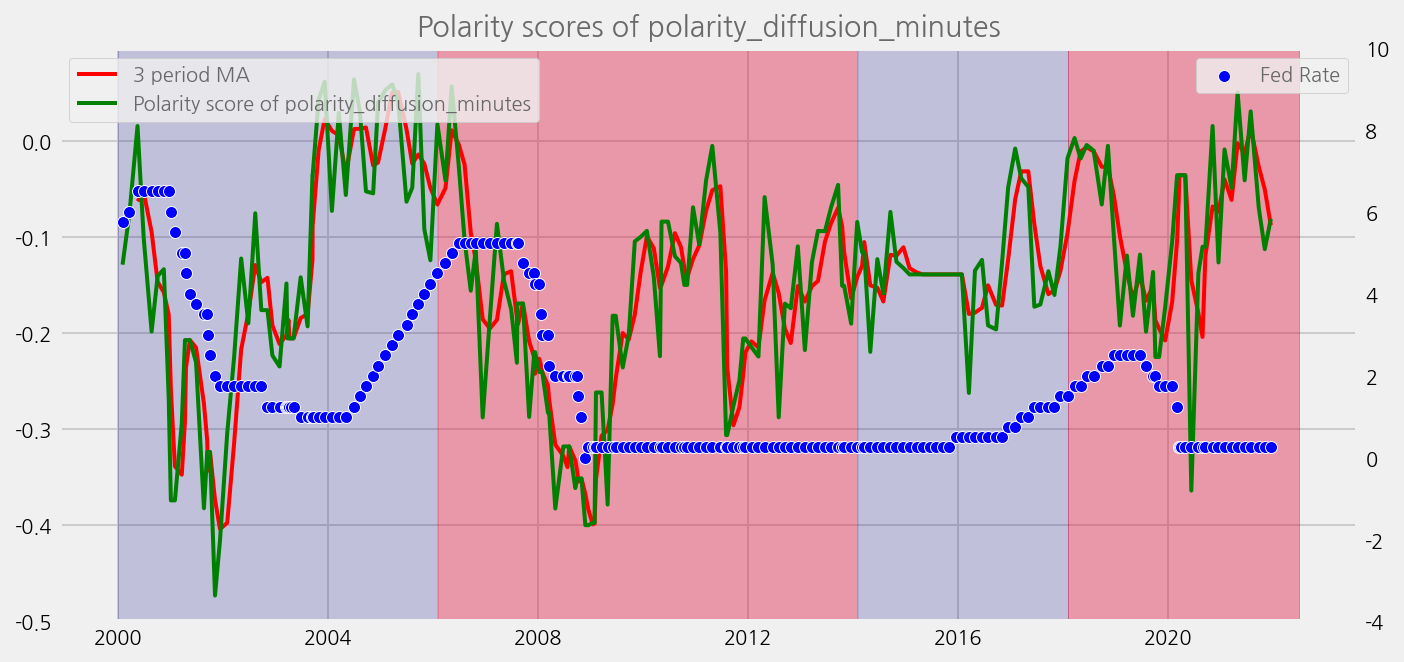

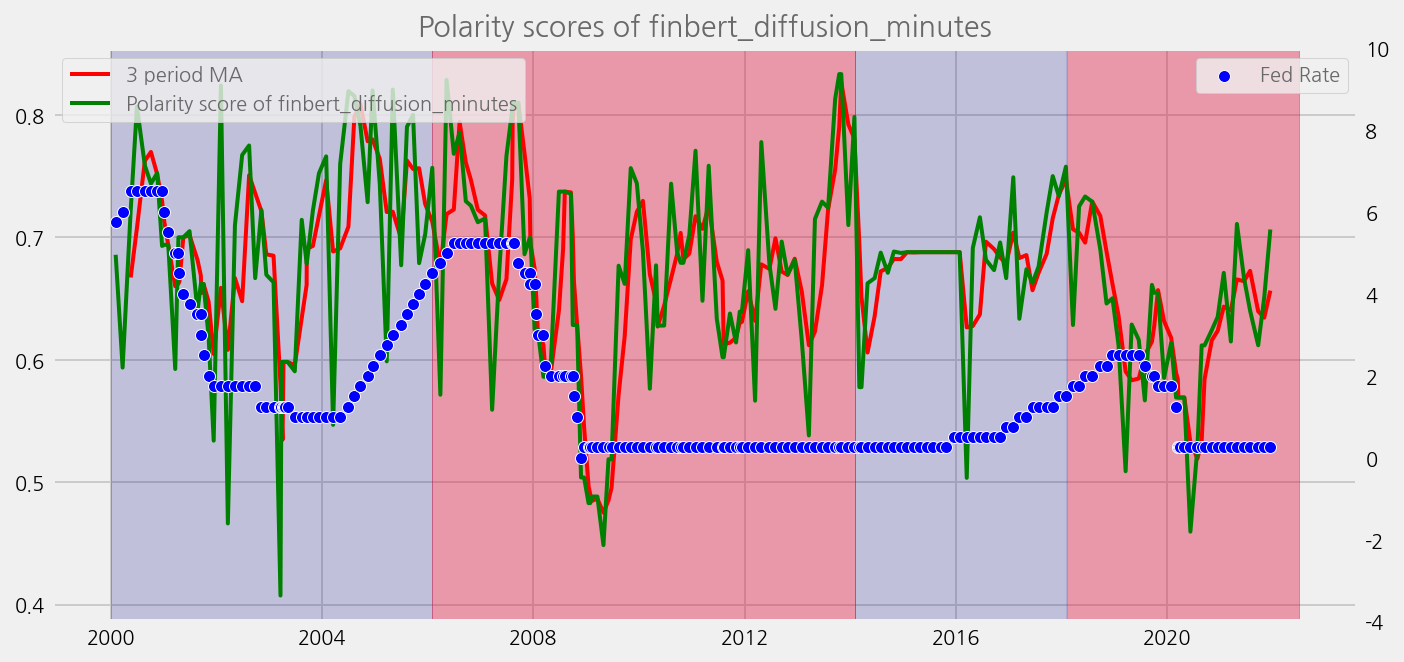

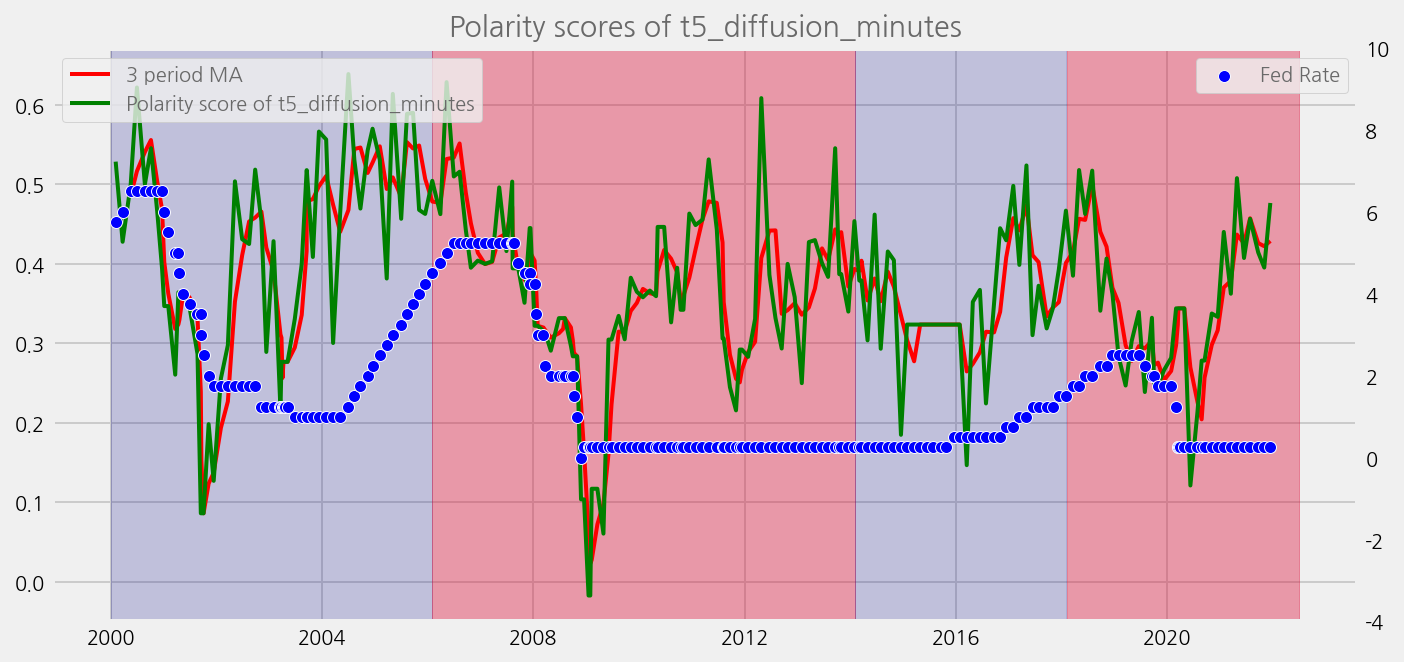

In [65]:
sentiments = ['polarity_diffusion_minutes', 'finbert_diffusion_minutes', 't5_diffusion_minutes']
for name in sentiments:
    plot_sentiments_over_chair_periods(name)

## Build and load a feature set with tones

In [66]:
econ_train_small = eKonf.load_data("econ_train_small.parquet", data_dir)
econ_train_small

target  prev_decision  GDP_diff_prev   PMI  EMP_diff_prev  \
date                                                                   
1982-10-05    Cut            0.0       0.456199  38.8      -0.201426   
1982-11-16    Cut           -1.0      -0.382299  39.4      -0.309476   
1982-12-21   Hold           -1.0      -0.382299  39.2      -0.136097   
1983-01-14   Hold            0.0      -0.382299  42.8      -0.016895   
1983-01-21   Hold            0.0      -0.382299  42.8      -0.016895   
...           ...            ...            ...   ...            ...   
2021-11-03   Hold            0.0       0.570948  60.5       0.288624   
2021-12-15   Hold            0.0       0.570948  60.6       0.437147   
2022-01-26   Hold            0.0       0.570948  58.8       0.395555   
2022-03-16   Hike            0.0       1.680778  58.6       0.476814   
2022-05-04   Hike            1.0      -0.355417  57.1       0.283658   

            RSALES_diff_year  UNEMP_diff_prev  HSALES_diff_year  Inertia_diff  \
date                                                                            
1982-10-05          2.094256         3.061224         42.307692           0.0   
1982-11-16          2.094256         2.970297         34.831461           0.0   
1982-12-21          2.094256         3.846154         45.026178           0.0   
1983-01-14          2.094256         0.000000         14.004376           0.0   
1983-01-21          2.094256         0.000000         14.004376           0.0   
...                      ...              ...               ...           ...   
2021-11-03          8.474656        -9.615385        -26.135217           0.0   
2021-12-15         10.977142        -8.695652        -11.163337           0.0   
2022-01-26          9.101289        -7.142857         -3.673938           0.0   
2022-03-16          9.076698        -5.000000          3.125000           0.0   
2022-05-04         -0.034915         0.000000        -26.946848           0.0   

            Balanced_diff  
date                       
1982-10-05            0.0  
1982-11-16            0.0  
1982-12-21            0.0  
1983-01-14            0.0  
1983-01-21            0.0  
...                   ...  
2021-11-03            0.0  
2021-12-15            0.0  
2022-01-26            0.0  
2022-03-16            0.0  
2022-05-04            0.0  

[415 rows x 10 columns]

In [67]:
cols = [
    'polarity_diffusion_minutes', 'polarity_diffusion_speech', 'polarity_diffusion_statement',
    'finbert_diffusion_minutes', 'finbert_diffusion_speech', 'finbert_diffusion_statement',
    't5_diffusion_minutes', 't5_diffusion_speech', 't5_diffusion_statement'
]
fomc_train_tones = econ_train_small.merge(merged_tone_data[cols], left_index=True, right_index=True)
fomc_train_tones.index.name = 'date'
eKonf.save_data(fomc_train_tones, "fomc_train_tones.parquet", data_dir)
fomc_train_tones

target  prev_decision  GDP_diff_prev   PMI  EMP_diff_prev  \
date                                                                   
2000-02-02   Hike            0.0       1.642779  57.8       0.234544   
2000-03-21   Hike            1.0       1.642779  55.8       0.090836   
2000-05-16   Hike            1.0       0.364447  54.7       0.221891   
2000-06-28   Hold            1.0       0.364447  53.2       0.164534   
2000-08-22   Hold            0.0       1.820583  52.5       0.132515   
...           ...            ...            ...   ...            ...   
2021-06-16   Hold            0.0       1.533890  61.6       0.308928   
2021-07-28   Hold            0.0       1.533890  60.9       0.383765   
2021-09-22   Hold            0.0       1.640747  59.7       0.353173   
2021-11-03   Hold            0.0       0.570948  60.5       0.288624   
2021-12-15   Hold            0.0       0.570948  60.6       0.437147   

            RSALES_diff_year  UNEMP_diff_prev  HSALES_diff_year  Inertia_diff  \
date                                                                            
2000-02-02          6.611229        -2.439024         -8.008430      0.010299   
2000-03-21          5.618482         2.500000          0.943396      0.000000   
2000-05-16          4.213922        -5.000000         -8.387800      0.000000   
2000-06-28          3.303900         5.263158         -3.490991      0.000000   
2000-08-22          2.214409         0.000000         -1.444444      0.000000   
...                      ...              ...               ...           ...   
2021-06-16         22.314413        -3.333333          4.815864      0.000000   
2021-07-28         13.352829         1.724138        -22.559653      0.000000   
2021-09-22          9.952513        -3.703704        -33.783784      0.000000   
2021-11-03          8.474656        -9.615385        -26.135217      0.000000   
2021-12-15         10.977142        -8.695652        -11.163337      0.000000   

            Balanced_diff  polarity_diffusion_minutes  \
date                                                    
2000-02-02      -0.068659                   -0.128571   
2000-03-21       0.000000                   -0.074866   
2000-05-16       0.000000                    0.015873   
2000-06-28       0.000000                   -0.100840   
2000-08-22       0.000000                   -0.198276   
...                   ...                         ...   
2021-06-16       0.000000                   -0.040741   
2021-07-28       0.000000                    0.031142   
2021-09-22       0.000000                   -0.069079   
2021-11-03       0.000000                   -0.112403   
2021-12-15       0.000000                   -0.080851   

            polarity_diffusion_speech  polarity_diffusion_statement  \
date                                                                  
2000-02-02                  -0.383562                     -0.153846   
2000-03-21                   0.123894                     -0.263158   
2000-05-16                   0.009174                     -0.131579   
2000-06-28                  -0.044248                      0.000000   
2000-08-22                  -0.442105                      0.000000   
...                               ...                           ...   
2021-06-16                  -0.007874                      0.307692   
2021-07-28                   0.087719                      0.384615   
2021-09-22                   0.135802                      0.461538   
2021-11-03                  -0.428571                      0.428571   
2021-12-15                  -0.100000                      0.176471   

            finbert_diffusion_minutes  finbert_diffusion_speech  \
date                                                              
2000-02-02                   0.685714                  0.506849   
2000-03-21                   0.593583                  0.420354   
2000-05-16                   0.722222                  0.431193   
2000-06-28         

In [88]:
econ_cols = [
    "prev_decision",
    "GDP_diff_prev",
    "PMI",
    "EMP_diff_prev",
    "RSALES_diff_year",
    "UNEMP_diff_prev",
    "HSALES_diff_year",
    "Inertia_diff",
    "Balanced_diff",
]
data_cols = econ_cols + ['polarity_diffusion_minutes', 'polarity_diffusion_speech', 'polarity_diffusion_statement']

cfg = eKonf.compose("dataset=feature_build")
cfg.name = "fomc_tone_features_lm"
cfg.data_dir = data_dir
cfg.data_file = "fomc_train_tones.parquet"
cfg.force.build = True
cfg.pipeline.split_sampling.stratify_on = "target"
cfg.pipeline.split_sampling.random_state = 123
cfg.pipeline.split_sampling.test_size = 0.25
cfg.pipeline.reset_index.index_column_name = "date"
cfg.column_info.columns.index = "index"
cfg.column_info.columns.id = "date"
cfg.column_info.columns.x = data_cols
cfg.column_info.columns.y = "target"
f_tones = eKonf.instantiate(cfg)
f_tones.persist()


data_cols = econ_cols + ['finbert_diffusion_minutes', 'finbert_diffusion_speech', 'finbert_diffusion_statement']
cfg.name = "fomc_tone_features_finbert"
cfg.column_info.columns.x = data_cols
f_tones = eKonf.instantiate(cfg)
f_tones.persist()

data_cols = econ_cols + ['t5_diffusion_minutes', 't5_diffusion_speech', 't5_diffusion_statement']
cfg.name = "fomc_tone_features_t5"
cfg.column_info.columns.x = data_cols
f_tones = eKonf.instantiate(cfg)
f_tones.persist()

In [90]:
cfg = eKonf.compose(config_group="dataset=feature")
cfg.name = "fomc_tone_features_lm"
cfg.data_dir = data_dir
f_tones = eKonf.instantiate(cfg)
print(f_tones)

FeatureSet : fomc_tone_features_lm


In [91]:
f_tones.data

date target  prev_decision  GDP_diff_prev   PMI  EMP_diff_prev  \
0   2006-08-08   Hold            1.0       0.245584  53.0       0.143041   
1   2017-05-03   Hold            1.0       0.471931  56.6       0.097382   
2   2004-06-30   Hike            0.0       0.572916  61.4       0.215355   
3   2006-01-31   Hike            1.0       0.567928  55.1       0.115562   
4   2007-08-16   Hold            0.0       0.638435  52.4      -0.022453   
..         ...    ...            ...            ...   ...            ...   
206 2004-03-16   Hold            0.0       1.154046  59.9       0.042824   
207 2015-04-29   Hold            0.0       0.448993  51.5       0.050412   
208 2002-09-24   Hold            0.0       0.615502  50.3      -0.002297   
209 2007-08-10   Hold            0.0       0.638435  52.4      -0.022453   
210 2016-04-27   Hold            0.0       0.146234  51.7       0.165252   

     RSALES_diff_year  UNEMP_diff_prev  HSALES_diff_year  Inertia_diff  ...  \
0           -0.497689         2.173913        -30.525558      0.000000  ...   
1            2.249398        -4.347826         18.796992      0.000000  ...   
2            4.578523         0.000000         15.120594      0.000000  ...   
3            1.297929        -2.000000         -0.241546      0.003239  ...   
4            0.622821         2.173913        -19.378238      0.000000  ...   
..                ...              ...               ...           ...  ...   
206          5.170631        -1.754386         23.824786      0.000000  ...   
207          2.971598        -1.818182         18.518519      0.000000  ...   
208          2.206995        -1.724138         17.090069      0.000000  ...   
209          0.622821         2.173913        -19.378238      0.000000  ...   
210          1.078655         2.040816         10.833333      0.000000  ...   

     polarity_diffusion_minutes  polarity_diffusion_speech  \
0                     -0.103175                  -0.045113   
1                     -0.047619                  -0.103704   
2                      0.064516                  -0.328467   
3                      0.018018                   0.168421   
4                     -0.169014                   0.097345   
..                          ...                        ...   
206                    0.029557                  -0.048193   
207                   -0.138728                  -0.197368   
208                   -0.175926                   0.141176   
209                   -0.169014                   0.097345   
210                   -0.134783                   0.168317   

     polarity_diffusion_statement  finbert_diffusion_minutes  \
0                        0.250000                   0.785714   
1                        0.157895                   0.673993   
2                        0.206897                   0.819355   
3                        0.100000                   0.756757   
4                        0.000000                   0.809859   
..                            ...                        ...   
206                      0.079365                   0.546798   
207                      0.090909                   0.687861   
208                     -0.130435                   0.666667   
209                     -0.333333                   0.809859   
210                      0.111111                   0.691304   

     finbert_diffusion_speech  finbert_diffusion_statement  \
0                    0.714286                     0.750000   
1                    0.118519                     0.526316   
2                    0.445255                     0.534483   
3                    0.610526                     0.500000   
4                    0.159292                     0.333333   
..                        ...                          ...   
206                  0.566265                     0.666667   
207                  0.631579                     0.545455   
208                  0.470588                     0.407407   
209           

## Visualize Features

In [92]:
f_tones.y_train = f_tones.transform_labels(f_tones.y_train)
f_tones.y_dev = f_tones.transform_labels(f_tones.y_dev)
f_tones.y_test = f_tones.transform_labels(f_tones.y_test)

In [93]:
X_cols = f_tones.COLUMN.X
y_col = f_tones.COLUMN.Y
print(f_tones.classes, X_cols, y_col)

['Cut', 'Hike', 'Hold'] ['prev_decision', 'GDP_diff_prev', 'PMI', 'EMP_diff_prev', 'RSALES_diff_year', 'UNEMP_diff_prev', 'HSALES_diff_year', 'Inertia_diff', 'Balanced_diff', 'polarity_diffusion_minutes', 'polarity_diffusion_speech', 'polarity_diffusion_statement'] target


In [94]:
f_tones.train_data.head()

date  target  prev_decision  GDP_diff_prev   PMI  EMP_diff_prev  \
index                                                                         
0     2006-08-08       2            1.0       0.245584  53.0       0.143041   
1     2017-05-03       2            1.0       0.471931  56.6       0.097382   
2     2004-06-30       1            0.0       0.572916  61.4       0.215355   
3     2006-01-31       1            1.0       0.567928  55.1       0.115562   
4     2007-08-16       2            0.0       0.638435  52.4      -0.022453   

       RSALES_diff_year  UNEMP_diff_prev  HSALES_diff_year  Inertia_diff  ...  \
index                                                                     ...   
0             -0.497689         2.173913        -30.525558      0.000000  ...   
1              2.249398        -4.347826         18.796992      0.000000  ...   
2              4.578523         0.000000         15.120594      0.000000  ...   
3              1.297929        -2.000000         -0.241546      0.003239  ...   
4              0.622821         2.173913        -19.378238      0.000000  ...   

       polarity_diffusion_minutes  polarity_diffusion_speech  \
index                                                          
0                       -0.103175                  -0.045113   
1                       -0.047619                  -0.103704   
2                        0.064516                  -0.328467   
3                        0.018018                   0.168421   
4                       -0.169014                   0.097345   

       polarity_diffusion_statement  finbert_diffusion_minutes  \
index                                                            
0                          0.250000                   0.785714   
1                          0.157895                   0.673993   
2                          0.206897                   0.819355   
3                          0.100000                   0.756757   
4                          0.000000                   0.809859   

       finbert_diffusion_speech  finbert_diffusion_statement  \
index                                                          
0                      0.714286                     0.750000   
1                      0.118519                     0.526316   
2                      0.445255                     0.534483   
3                      0.610526                     0.500000   
4                      0.159292                     0.333333   

       t5_diffusion_minutes  t5_diffusion_speech  t5_diffusion_statement  \
index                                                                      
0                  0.515873             0.503759                0.625000   
1                  0.523810             0.103704                0.473684   
2                  0.638710             0.197080                0.344828   
3                  0.504505             0.410526                0.333333   
4                  0.394366             0.141593                0.000000   

       split  
index         
0      train  
1      train  
2      train  
3      train  
4      train  

[5 rows x 21 columns]

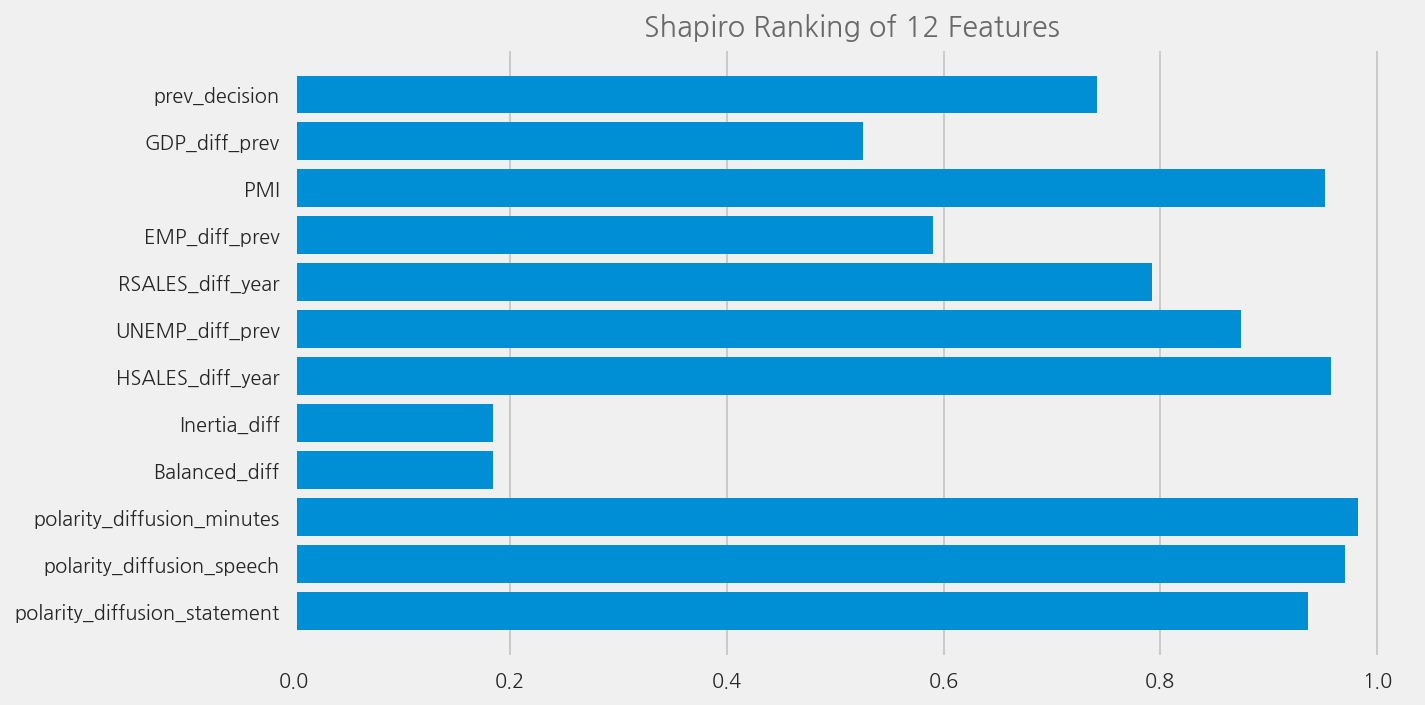

In [95]:
cfg = eKonf.compose(config_group="visualize/plot=rank1d")
cfg.plots[0].x = X_cols
cfg.plots[0].y = y_col
cfg.plots[0].classes = f_tones.classes
eKonf.instantiate(cfg, data=f_tones.data)

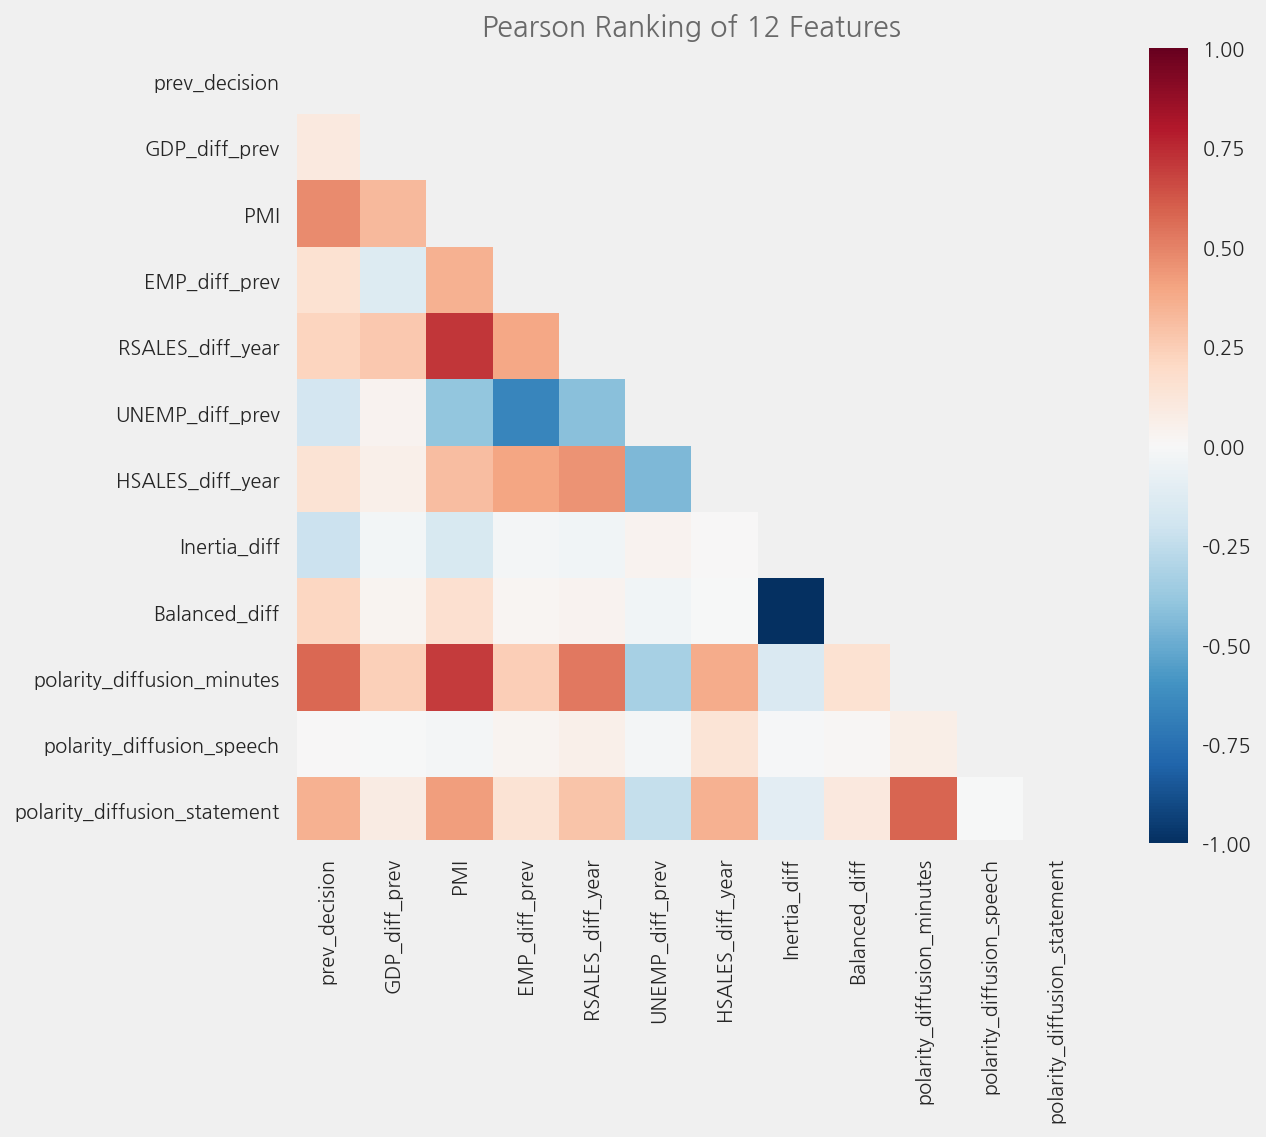

In [96]:
cfg = eKonf.compose(config_group="visualize/plot=rank2d")
cfg.plots[0].x = X_cols
cfg.plots[0].y = y_col
cfg.figure.figsize = (10, 8)
eKonf.instantiate(cfg, data=f_tones.data)

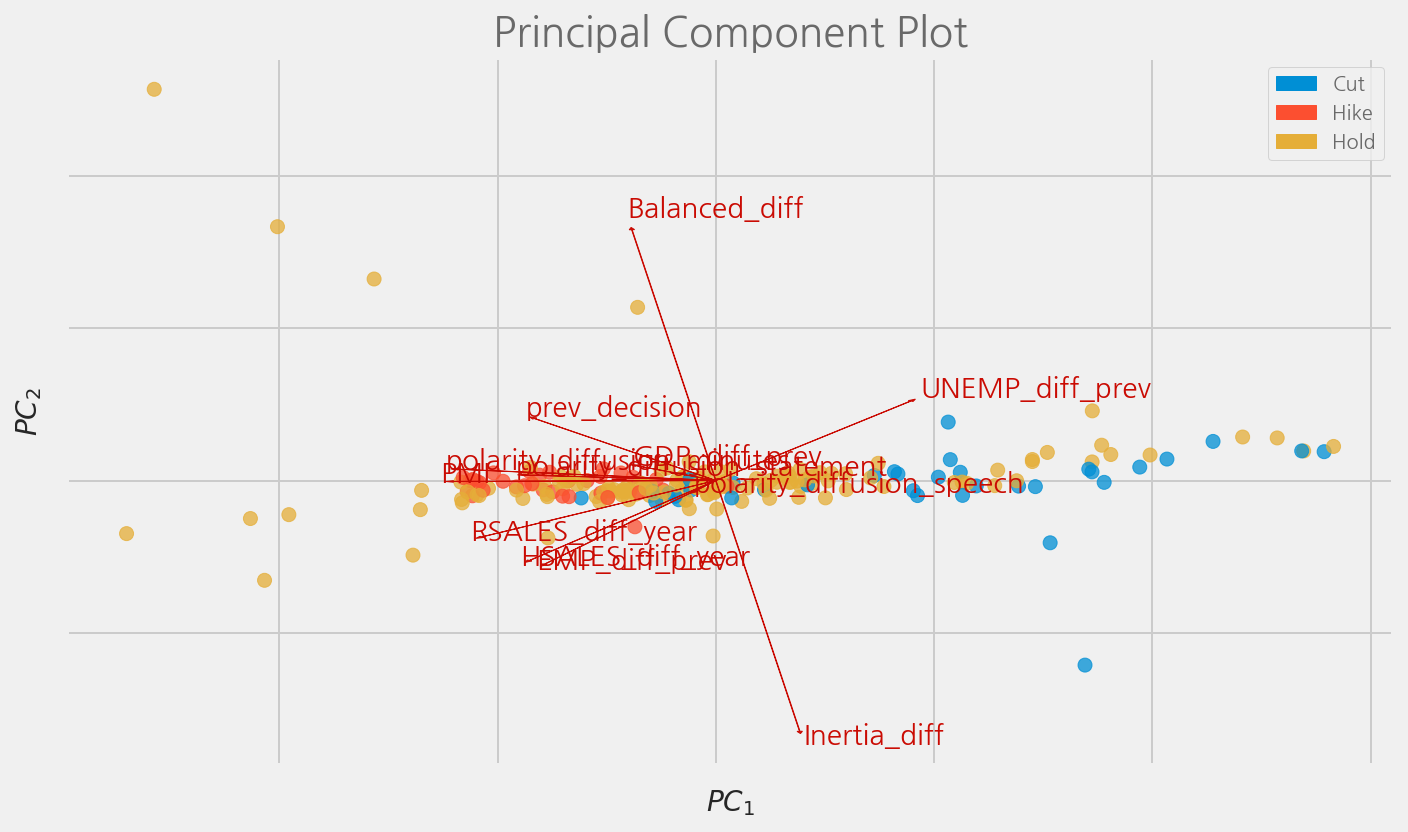

In [97]:
cfg = eKonf.compose(config_group="visualize/plot=pca")
cfg.plots[0].x = X_cols
cfg.plots[0].y = y_col
cfg.plots[0].classes = f_tones.classes
cfg.figure.figsize = (10, 6)
cfg.figure.fontsize = 14
eKonf.instantiate(cfg, data=f_tones.data)

## Monetary Policy Shocks

In [126]:
ids = [
    'GDPC1',     # Real GDP    
    'PCECC96',   # Real Consumption    
    'GDPDEF',    # GDP Deflator
    'GPDIC1',    # Real investment
    'COMPRNFB',  # Real wage
    'OPHNFB',    # Labor productivity
    'FEDFUNDS',  # Federal funds rate
    'CP',        # Real profit
    'M2SL',      # M2
    'SP500',     # SP500
    'CPIAUCSL',  # CPI
]
    
cfg = eKonf.compose("io/fetcher=quandl")
cfg.series_name = 'value'
cfg.series_id = ids
cfg.force_download = True
quandl = eKonf.instantiate(cfg)

econ_data = quandl.data.reset_index()

In [118]:
# econ_data_q = econ_data.resample("Q").last().reset_index()
# econ_data_q

date    value series_id
0   1946-03-31      NaN        CP
1   1946-06-30      NaN        CP
2   1946-09-30      NaN        CP
3   1946-12-31      NaN        CP
4   1947-03-31   22.000  CPIAUCSL
..         ...      ...       ...
301 2021-06-30  270.955  CPIAUCSL
302 2021-09-30  274.214  CPIAUCSL
303 2021-12-31  280.126  CPIAUCSL
304 2022-03-31  287.708  CPIAUCSL
305 2022-06-30  291.474  CPIAUCSL

[306 rows x 3 columns]

In [127]:
cfg = eKonf.compose('pipeline/pivot')
cfg.index = 'date'
cfg.columns = 'series_id'
cfg.values = ['value']
econ_data_pivot = eKonf.pipe(econ_data, cfg)
econ_data_pivot
# eKonf.save_data(tone_data_lm, 'fomc_tone_data_lm.parquet', data_dir)

series_id       date  COMPRNFB     CP  CPIAUCSL  FEDFUNDS    GDPC1  GDPDEF  \
0         1946-01-01       NaN    NaN       NaN       NaN      NaN     NaN   
1         1946-04-01       NaN    NaN       NaN       NaN      NaN     NaN   
2         1946-07-01       NaN    NaN       NaN       NaN      NaN     NaN   
3         1946-10-01       NaN    NaN       NaN       NaN      NaN     NaN   
4         1947-01-01    35.824  21.97     21.48       NaN  2034.45  11.952   
...              ...       ...    ...       ...       ...      ...     ...   
3450      2022-06-24       NaN    NaN       NaN       NaN      NaN     NaN   
3451      2022-06-27       NaN    NaN       NaN       NaN      NaN     NaN   
3452      2022-06-28       NaN    NaN       NaN       NaN      NaN     NaN   
3453      2022-06-29       NaN    NaN       NaN       NaN      NaN     NaN   
3454      2022-06-30       NaN    NaN       NaN       NaN      NaN     NaN   

series_id   GPDIC1  M2SL  OPHNFB  PCECC96    SP500  
0              NaN   NaN     NaN      NaN      NaN  
1              NaN   NaN     NaN      NaN      NaN  
2              NaN   NaN     NaN      NaN      NaN  
3              NaN   NaN     NaN      NaN      NaN  
4          218.091   NaN  23.213  1277.44      NaN  
...            ...   ...     ...      ...      ...  
3450           NaN   NaN     NaN      NaN  3911.74  
3451           NaN   NaN     NaN      NaN  3900.11  
3452           NaN   NaN     NaN      NaN  3821.55  
3453           NaN   NaN     NaN      NaN  3818.83  
3454           NaN   NaN     NaN      NaN  3785.38  

[3455 rows x 12 columns]

In [128]:
econ_data_pivot.set_index('date').resample('Q').last()

series_id   COMPRNFB        CP  CPIAUCSL  FEDFUNDS      GDPC1   GDPDEF  \
date                                                                     
1946-03-31       NaN       NaN       NaN       NaN        NaN      NaN   
1946-06-30       NaN       NaN       NaN       NaN        NaN      NaN   
1946-09-30       NaN       NaN       NaN       NaN        NaN      NaN   
1946-12-31       NaN       NaN       NaN       NaN        NaN      NaN   
1947-03-31    35.824    21.970    22.000       NaN   2034.450   11.952   
...              ...       ...       ...       ...        ...      ...   
2021-06-30   115.152  2690.388   270.955      0.08  19368.310  117.413   
2021-09-30   115.035  2721.601   274.214      0.08  19478.893  119.115   
2021-12-31   115.726  2700.326   280.126      0.08  19806.290  121.188   
2022-03-31   114.427  2726.711   287.708      0.20  19727.918  123.615   
2022-06-30       NaN       NaN   291.474      0.77        NaN      NaN   

series_id     GPDIC1     M2SL   OPHNFB    PCECC96    SP500  
date                                                        
1946-03-31       NaN      NaN      NaN        NaN      NaN  
1946-06-30       NaN      NaN      NaN        NaN      NaN  
1946-09-30       NaN      NaN      NaN        NaN      NaN  
1946-12-31       NaN      NaN      NaN        NaN      NaN  
1947-03-31   218.091      NaN   23.213   1277.440      NaN  
...              ...      ...      ...        ...      ...  
2021-06-30  3506.014  20459.1  112.563  13665.610  4297.50  
2021-09-30  3609.693  20991.4  111.441  13732.408  4307.54  
2021-12-31  3903.047  21483.2  113.167  13818.356  4766.18  
2022-03-31  3951.071  21809.0  111.029  13881.110  4530.41  
2022-06-30       NaN  21754.2      NaN        NaN  3785.38  

[306 rows x 11 columns]